# Исследование объявлений о продаже квартир

В анализе представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
Необходимо определить рыночную стоимость объектов недвижимости. 
Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах (м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — общая площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

**План по выполнению проекта**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Общий вывод

## Загрузка данных

### Импорт библиотек

In [1]:
import warnings

# Игнорирование предупреждений
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Загрузка данных

In [2]:
# Загрузка данных
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

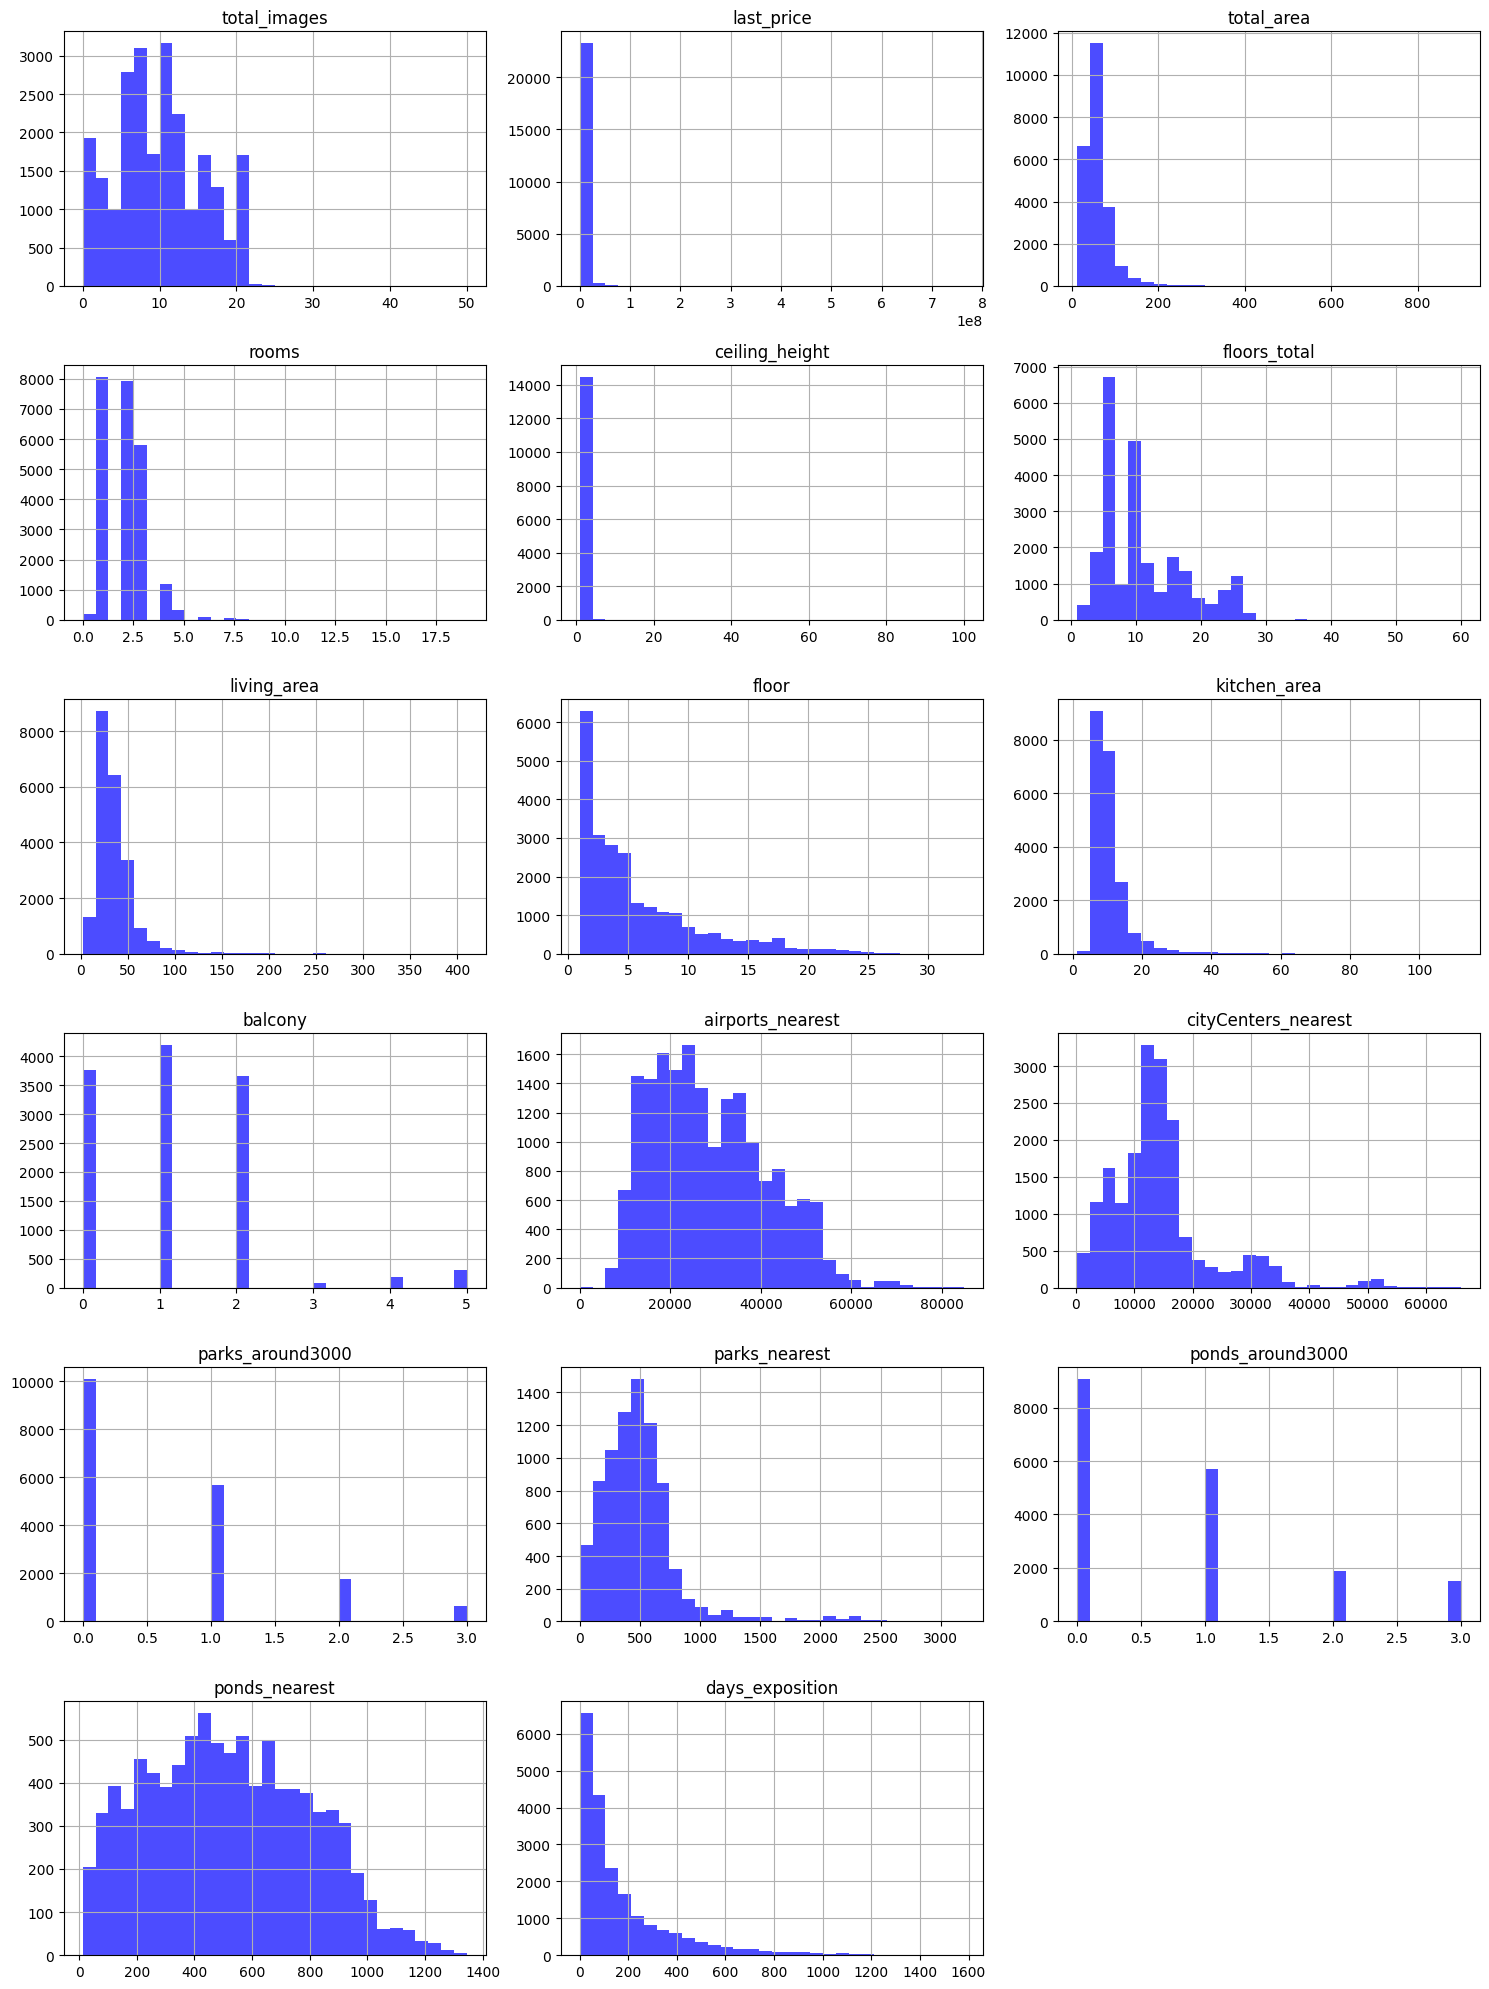

In [4]:
# Гистограммы

fig, axes = plt.subplots((len(data.select_dtypes(include=['number']).columns) + 2) // 3, 3, figsize=(15, 20)) # Создание подграфиков
axes = axes.flatten()  
# Построение гистограмм для каждого числового столбца
for i, col in enumerate(data.select_dtypes(include=['number']).columns):
    data[col].hist(bins=30, ax=axes[i], color='blue', alpha=0.7)
    axes[i].set_title(col)

# Удаление пустых подграфиков, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Автоматическая подгонка элементов графика
plt.show()

- В столбце 'last_price' распределение неравномерное. По графику видно, что есть несколько аномальных значений, в разы превышающие основной набор данных, из-за чего график нечитаем. Аналогичная ситуация со столбцами 'ceiling_height', 'total_area', 'living_area', 'kitchen_area' и 'rooms'. 
- По обрывистым графикам 'rooms', 'balcony', 'parks_around3000', 'ponds_around3000' видно, что тип данных выбран неверно: вместо float, должен быть integer
- По тому, как сильно отличается график 'cityCenters_nearest' от подобных ему параметров 'parks_nearest', 'ponds_nearest' и 'airports_nearest', можно предположить, что в данных много пропусков, искажающих общее распределение

## Предобработка данных

In [5]:
# количество пропущенных значений в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения есть в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

### Столбец ceiling_height

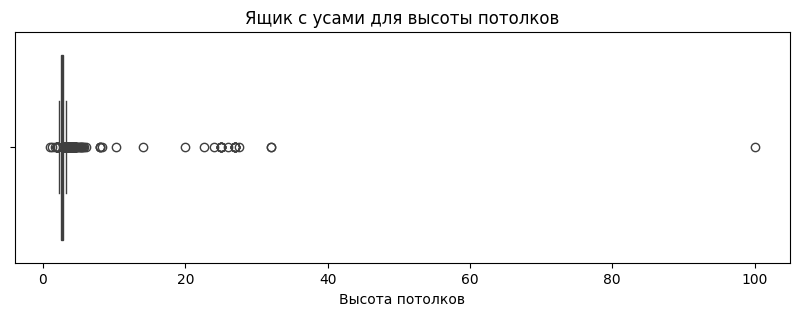

In [6]:
# Ящик с усами для столбца 'ceiling_height'
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['ceiling_height'])
plt.title('Ящик с усами для высоты потолков')
plt.xlabel('Высота потолков')
plt.show()

* Диаграмма размаха практически нечитаема

В СП 54.13330.2016 написано:"Высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) в
климатических подрайонах IA, IБ, IГ, IД и IVА, определяемых по СП 131.13330,
должна быть не менее 2,7 м, а в других климатических подрайонах - не менее
2,5 м." Санкт-Петербург и Лен.область относится к подрайону IIВ, теоретически минимальный порог возьмем 2,5м. Посмотрим, что с максимальным значением.

In [7]:
# Фильтрация данных для высоты потолка менее 2.5 метров
ceiling_height_to25 = data.query('ceiling_height < 2.5')

# Фильтрация данных для высоты потолка более 4 метров
ceiling_height_to4 = data.query('ceiling_height > 4')

Высота потолков в сталинках обычно до 4 метров. Несмотря на то, что количество строк с вариацией значений высоты потолков до 6 метров мало, оставлю эти значения: гипотетически, такое возможно в старом фонде. Все же самих вариаций достаточно много. Если бы был указан год постройки - было проще понять - являются эти значения истинными или нет. А еще лучше - указана серия дома, если дом был построен в советское время. Оставим также высоты потолков со значениями 25-32 м - выдвину предположение, что высота была ошибочно указана в см, переведу в м. Также оставим значения высоты потолка от 2.4 м, так как значений достаточно много, разница с минимальным по СП 10см - выглядит правдоподобно. Итак, оставляем высоту потолка 2,4-6м

In [8]:
# Замена некорректных значений высоты потолка на правильные значения
data['ceiling_height'] = data['ceiling_height'].replace(
    {25: 2.5, 26: 2.6, 27: 2.7, 27.5: 2.75, 32: 3.2}
)

In [9]:
# Фильтрация данных для высоты потолка в диапазоне от 2.4 до 6.0 метров
ceiling_height = data.query('2.4 <= ceiling_height <= 6.0')

# Заполнение пропусков средним значением высоты потолка из отфильтрованных данных
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height['ceiling_height'].median())  # Заполнение пропусков медианным значением

# Удаление строк с аномальными значениями высоты потолка
data = data.query('2.4 <= ceiling_height <= 6.0')

In [10]:
# проверка
# Сортировка уникальных значений в столбце
', '.join(map(str, sorted(data['ceiling_height'].unique())))

'2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0'

In [11]:
data['ceiling_height'].isna().sum() #проверяю остались ли пропуски

0

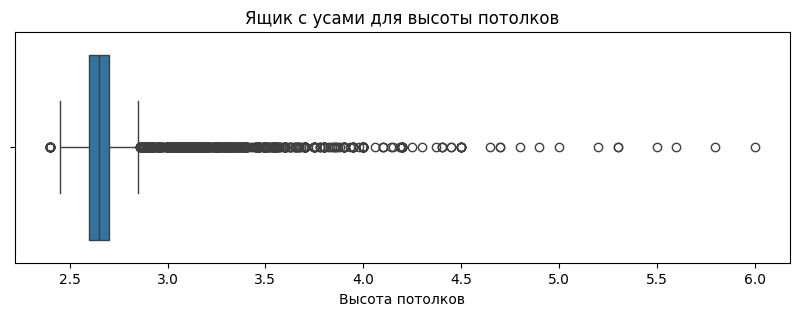

In [12]:
# Ящик с усами для столбца 'ceiling_height'
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['ceiling_height'])
plt.title('Ящик с усами для высоты потолков')
plt.xlabel('Высота потолков')
plt.show()

Распределение выглядит лучше

### Столбец floors_total

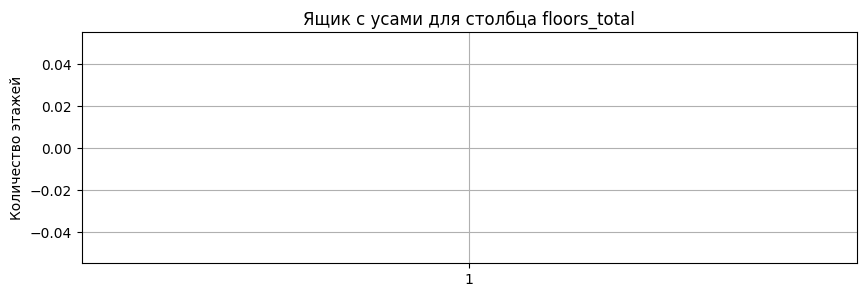

In [13]:
# Ящик с усами
plt.figure(figsize=(10, 3))
plt.boxplot(data['floors_total'])
plt.title('Ящик с усами для столбца floors_total')
plt.ylabel('Количество этажей')
plt.grid(True)
plt.show()

График разброса данных невозможно разобрать.

In [14]:
# Подсчет количества уникальных значений в столбце 'floorstotal', сортировка по индексу и вывод первых 15 значений
data['floors_total'].value_counts().sort_index().head(15)

floors_total
1.0       24
2.0      380
3.0      668
4.0     1200
5.0     5775
6.0      914
7.0      592
8.0      390
9.0     3759
10.0    1174
11.0     203
12.0    1360
13.0     229
14.0     551
15.0     364
Name: count, dtype: int64

In [15]:
# Подсчет количества значений в столбце 'floorstotal', где значение больше или равно 28
data.query('floors_total >= 28')['floors_total'].value_counts().sort_index()

floors_total
28.0    21
29.0     1
33.0     1
34.0     1
35.0    24
36.0     3
52.0     1
60.0     1
Name: count, dtype: int64

Самый высокий жилой дом в Санкт-Петербурге действительно имеет 36 этажей. 60 этажей есть разве что в Лахта-центре, но жилых квартир там нет. В Парголово и Мурино есть жилые дома с 29 этажей. Снова жаль, что нет указаний насчет года постройки, было бы проще определить реальные ли это цифры или нет. Удалю строки с 52 и 60 этажами. Пропуски заполнять не буду, не понятно, по какому критерию их нужно заполнять. 

In [16]:
# удаление строк с аномальными значениями
data = data.query('floors_total != 52 & floors_total != 60')

# Вывод уникальных значений в строку # Проверка уникальных значений 'floors_total' и сортировка
', '.join(map(str, sorted(data['floors_total'].unique().tolist())))  

'1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, nan, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0'

Так как нет качественных вариантов заполнения пропусков, удалю строки с пропущенными значениями

In [17]:
#удаление строк с пропущенными значениями
data = data.dropna(subset=['floors_total'])
# проверка

', '.join(map(str, sorted(data['floors_total'].unique().tolist())))  

'1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0'

In [18]:
data['floors_total'] = data['floors_total'].astype(int) #меняю тип данных на целочисленный
#data.info() #проверка

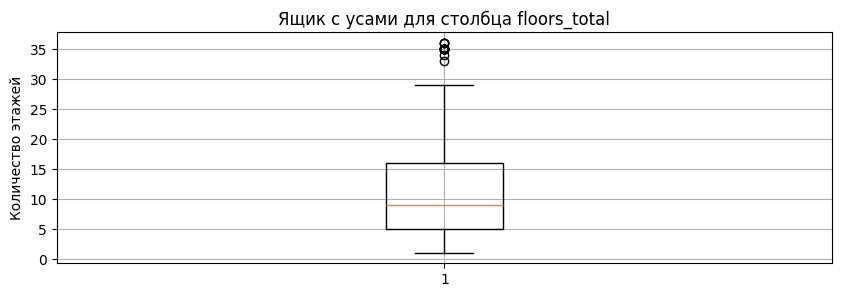

In [19]:
# Ящик с усами
plt.figure(figsize=(10, 3))
plt.boxplot(data['floors_total'])
plt.title('Ящик с усами для столбца floors_total')
plt.ylabel('Количество этажей')
plt.grid(True)
plt.show()

* Распределение признака значительно улучшилось

### Столбец living_area

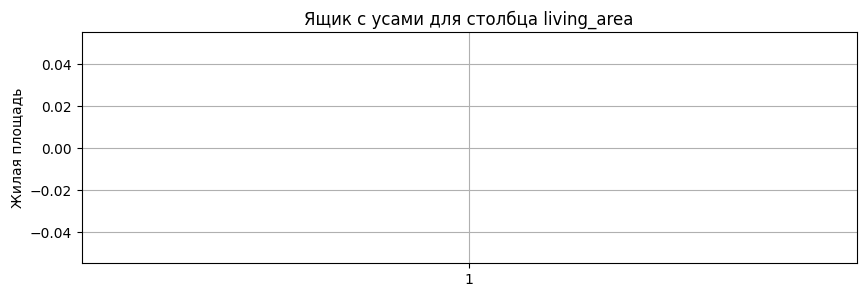

In [20]:
plt.figure(figsize=(10, 3))
plt.boxplot(data['living_area'])
plt.title('Ящик с усами для столбца living_area')
plt.ylabel('Жилая площадь')
plt.grid(True)
plt.show()

- Диаграмма нечитаемая

In [21]:
data['living_area'].value_counts().head()

living_area
18.0    881
17.0    674
30.0    598
16.0    484
20.0    480
Name: count, dtype: int64

Большинство квартир - это студии c жилой площадью 18м2. Посмотрю, какую же минимальную площадь можно взять для сортировки.

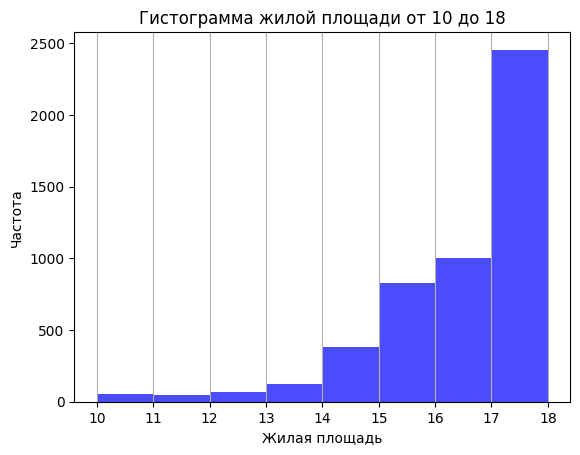

In [22]:
data.query('living_area >= 10 & living_area <= 18')['living_area'].hist(bins=8, color='blue', alpha=0.7)
plt.title('Гистограмма жилой площади от 10 до 18')
plt.xlabel('Жилая площадь')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

Строк с минимальнымы значениями 10, 11, 12 и 13 кв.м. достаточно много, возьму минимум 10 кв.м.

In [23]:
# Фильтруем данные, чтобы получить записи с жилой площадью 200 и более квадратных метров
# Создаем сводную таблицу для анализа жилой площади и количества комнат
pivot_table = data.query('living_area >= 200').pivot_table(index='rooms', 
                                 values='living_area', 
                                 aggfunc=['mean', 'median', 'count'], 
                                 fill_value=0)

# Выводим сводную таблицу
print(pivot_table)

             mean      median       count
      living_area living_area living_area
rooms                                    
4      237.175000      249.35           4
5      250.240000      255.70           5
6      249.400000      248.80           4
7      268.433333      250.00          12
8      240.000000      240.00           2
9      237.950000      237.95           2
12     409.700000      409.70           1
14     222.000000      222.00           1
15     409.000000      409.00           1
19     264.500000      264.50           1


Сложно определить аномалии в квартирах с жилой площадью более 200кв.м. - у них у всех достаточно много комнат. Для начала я удалю явно аномальные строки с жилой площадью меньше 10кв.м. и в квартирах до 18кв.м должно быть указано, что это студия, а затем заполню пропуски медианными значениями в зависимости от общей площади квартиры.

In [24]:
# Фильтруем данные, исключая квартиры-студии с жилой площадью от 10 до 18 квадратных метров
data = data.query('living_area >= 10 & ~(living_area <= 18 & studio == True)')

# Заполняем пропуски в столбце living_area медианой по группам total_area
data['living_area'] = data['living_area'].fillna(data.groupby(['total_area'])['living_area'].transform('median'))

# Проверяем количество оставшихся пропусков в столбце living_area
data['living_area'].isna().sum()

0

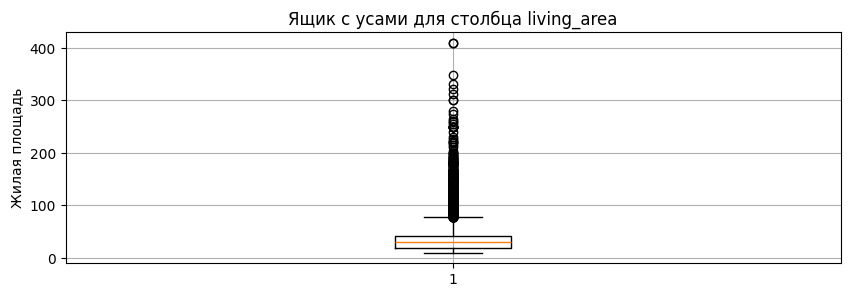

In [25]:
plt.figure(figsize=(10, 3))
plt.boxplot(data['living_area'])
plt.title('Ящик с усами для столбца living_area')
plt.ylabel('Жилая площадь')
plt.grid(True)
plt.show()

* Диаграмма размаха стала более читаемой.

### Столбец is_apartment

In [26]:
# Получаем уникальные значения
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Столбец 'is_apartment' должен содержать булевы значения, но в нем все еще есть пропуски. Предположу, что пропуски указывают на то, что квартира не является апартаментами. В связи с этим, я изменю пропуски на False и преобразую тип данных в bool.

In [27]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Уникальные значения в столбце is_apartment:', data['is_apartment'].unique()) #проверка

Уникальные значения в столбце is_apartment: [False  True]


In [28]:
data['is_apartment'].value_counts(normalize = True).round(3)

is_apartment
False    0.998
True     0.002
Name: proportion, dtype: float64

Только 0.002% квартир являются апартаментами

### Столбец kitchen_area

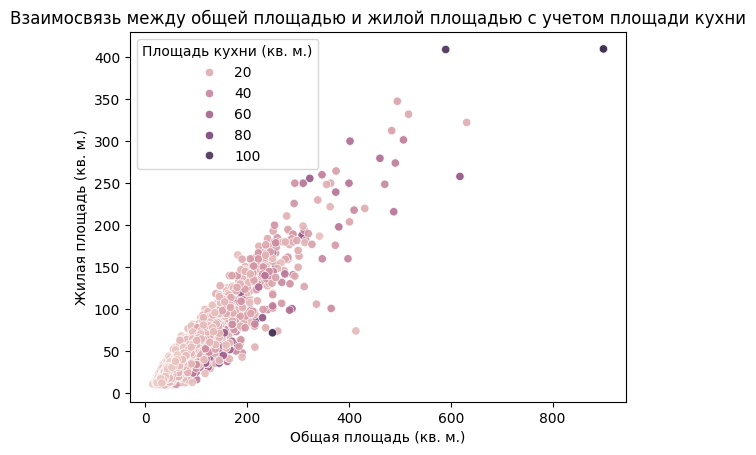

In [29]:
# Визуализируем взаимосвязь между общей площадью (total_area) и жилой площадью (living_area)
# Используем рассеянный график, где цвет точек (hue) соответствует площади кухни (kitchen_area)
sns.scatterplot(data=data, x='total_area', y='living_area', hue='kitchen_area', alpha=0.9)
plt.title('Взаимосвязь между общей площадью и жилой площадью с учетом площади кухни')
plt.xlabel('Общая площадь (кв. м.)')
plt.ylabel('Жилая площадь (кв. м.)')
plt.legend(title='Площадь кухни (кв. м.)')

# Отображаем график
plt.show()

По диаграмме рассеивания, видно, что значения столбцов 'total_area', 'living_area', 'kitchen_area' имеют логичную корреляцию, следовательно, аномальных значений быть не должно. Свяжу пропуски в столбце 'kitchen_area' с медианными значениями по столбцам 'living_area' и 'total_area', и таким образом заполню пустые строки.

In [30]:
# Заполняем пропуски в столбце kitchen_area медианными значениями по группам total_area и living_area
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['total_area', 'living_area'])['kitchen_area'].transform('median'))

# Заполняем оставшиеся пропуски медианными значениями по группе living_area
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['living_area'])['kitchen_area'].transform('median'))

# Заполняем любые оставшиеся пропуски медианным значением по всему столбцу kitchen_area
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

# Проверяем количество оставшихся пропусков в столбце kitchen_area
data['kitchen_area'].isna().sum()

0

### Столбец balcony

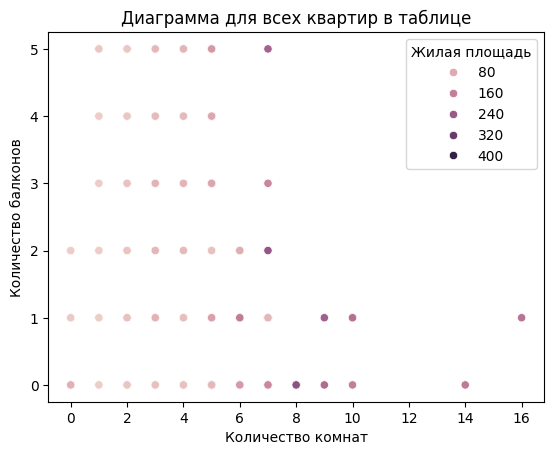

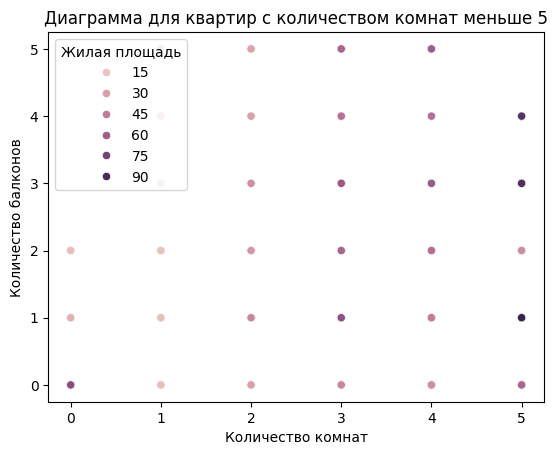

In [31]:
# Визуализируем зависимость между количеством комнат (rooms) и количеством балконов (balcony) для всех квартир
sns.scatterplot(data=data, x='rooms', y='balcony', hue='living_area')
plt.title('Диаграмма для всех квартир в таблице')
plt.xlabel('Количество комнат')
plt.ylabel('Количество балконов')
plt.legend(title='Жилая площадь')
plt.show()

# Фильтруем данные для квартир с количеством комнат до 5 и жилой площадью менее 100
balcony = data.query('rooms <= 5 & living_area < 100')

# Визуализируем зависимость для отфильтрованных квартир
sns.scatterplot(data=balcony, x='rooms', y='balcony', hue='living_area', alpha=1)
plt.title('Диаграмма для квартир с количеством комнат меньше 5')
plt.xlabel('Количество комнат')
plt.ylabel('Количество балконов')
plt.legend(title='Жилая площадь')
plt.show()

В столбце 'balcony' присутствует аномалия: в квартирах с небольшой площадью количество балконов превышает количество комнат. Аномалию не представляется возможным исправить качественно, приму в расчет, что данный столбец не будет участвовать в конечном анализе. 

In [32]:
# уникальные значения 
data.balcony.unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Предположу, что пропуски из-за отсутствия в квартире балконов и заполню нулями. Переведу столбец в int.

In [33]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Index: 21610 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21610 non-null  int64  
 1   last_price            21610 non-null  float64
 2   total_area            21610 non-null  float64
 3   first_day_exposition  21610 non-null  object 
 4   rooms                 21610 non-null  int64  
 5   ceiling_height        21610 non-null  float64
 6   floors_total          21610 non-null  int32  
 7   living_area           21610 non-null  float64
 8   floor                 21610 non-null  int64  
 9   is_apartment          21610 non-null  bool   
 10  studio                21610 non-null  bool   
 11  open_plan             21610 non-null  bool   
 12  kitchen_area          21610 non-null  float64
 13  balcony               21610 non-null  int32  
 14  locality_name         21567 non-null  object 
 15  airports_nearest      16

### Столбец locality_name

In [34]:
# для начала исправлю имя столбца
data.rename(columns = {'cityCenters_nearest':'citycenters_nearest'}, inplace = True)
data.columns #проверка

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [35]:
# Подсчет и вывод количества пропущенных значений 
print(data['locality_name'].isna().sum())

# Поиск максимального значения для 'Санкт-Петербург'
data.query("locality_name == 'Санкт-Петербург'")['citycenters_nearest'].max()  # 29493

43


29493.0

In [36]:
# Заполнение пропущенных значений значением 'Санкт-Петербург', 
# если 'citycenters_nearest' меньше 29493
data.query('citycenters_nearest < 29493')['locality_name'].fillna('Санкт-Петербург')

# Повторный подсчет и вывод количества пропущенных значений в столбце 'locality_name'
print(data['locality_name'].isna().sum())

43


В пропущенных строках столбца 'locality_name' нет Санкт-Петербурга, следовательно, все квартиры с пропусками в этом столбце находятся в Лен.области. 
Удалю неявные дубликаты в названиях населенных пунктов. Заполню пропуски общим названием "Лен.область"

In [37]:
# Подсчет и вывод количества уникальных значений в столбце 'locality_name'
print('Подсчет и вывод количества уникальных значений в столбце locality_name: ', len(data['locality_name'].unique()))

# Замена 'ё' на 'е' в столбце 'locality_name'
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

# Список строк для удаления из 'locality_name'
list = [
    "поселок ", 
    "поселок городского типа ", 
    "городской поселок ",
    'садовое товарищество ',
    'село ',
    'городской ',
    'городского типа ',
    'коттеджный ',
    'станции ',
    'имени ',
    'деревня ',
    'при железнодорожной ',
    'садоводческое некоммерческое товарищество ',
    'Пансионат '
]

# Удаление указанных строк из 'locality_name'
for i in list:
    data['locality_name'] = data['locality_name'].str.replace(i, '')

# Подсчет и вывод количества уникальных значений в столбце 'locality_name' после очистки
print('После очистки: ', len(data['locality_name'].unique()))

# Заполнение пропущенных значений в 'locality_name' значением 'Лен.область'
data['locality_name'] = data['locality_name'].fillna('Лен.область')

# Проверка количества пропущенных значений в 'locality_name'
print('Количество пропущенных значений в locality_name', data['locality_name'].isna().sum())

Подсчет и вывод количества уникальных значений в столбце locality_name:  349
После очистки:  290
Количество пропущенных значений в locality_name 0


### Столбцы days_exposition и 'first_day_exposition'

Предположу, что пропуски в столбце days_exposition (сколько дней было размещено объявление (от публикации до снятия)) есть по причине того, что на момент выгрузки данных объявления были еще не сняты. 

- Заменю пропущенные значения разницей между максимальным значением first_day_exposition и значением first_day_exposition.

- Переведу столбец 'first_day_exposition' в формат datetime

- Переведу столбец 'days_exposition' в формат int

In [38]:
# Преобразование столбца в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

# Заполнение пропущенных значений 
for row in data:
    data['days_exposition'] = data['days_exposition'].fillna(data['first_day_exposition'].max()-data['first_day_exposition'])

# Приведение 'days_exposition' к строковому типу
data['days_exposition'] = data['days_exposition'].astype(str)  

# Список строк для удаления из 'days_exposition'
list = [' days 00:00:00']
for i in list:
    data['days_exposition'] =  data['days_exposition'].str.replace(i, '')

# Изменение типа данных
data['days_exposition'] = data['days_exposition'].astype(float) 
data['days_exposition'] = data['days_exposition'].astype(int) 

In [39]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Index: 21610 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21610 non-null  int64         
 1   last_price            21610 non-null  float64       
 2   total_area            21610 non-null  float64       
 3   first_day_exposition  21610 non-null  datetime64[ns]
 4   rooms                 21610 non-null  int64         
 5   ceiling_height        21610 non-null  float64       
 6   floors_total          21610 non-null  int32         
 7   living_area           21610 non-null  float64       
 8   floor                 21610 non-null  int64         
 9   is_apartment          21610 non-null  bool          
 10  studio                21610 non-null  bool          
 11  open_plan             21610 non-null  bool          
 12  kitchen_area          21610 non-null  float64       
 13  balcony              

### Столбец floor  

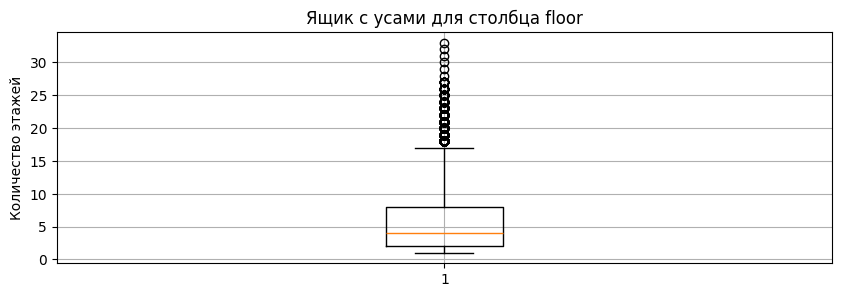

Медианна: 4.0


In [40]:
plt.figure(figsize=(10, 3))
plt.boxplot(data['floor'])
plt.title('Ящик с усами для столбца floor')
plt.ylabel('Количество этажей')
plt.grid(True)
plt.show()

print('Медианна:' , data['floor'].median())

* Медианный этаж — четвёртый. На диаграмме размаха выбросами указываются значения выше 15 этажа. 

In [41]:
# Переведу значения столбца в int, так как этаж является целочисленным значением
data['floor'] = data['floor'].astype(int) 

In [42]:
data.query('floor > floors_total') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


* аномалии не найдены

### Столбец open_plan 

In [43]:
data['open_plan'].unique()

array([False,  True])

In [44]:
# Относительное количество уникальных значений в столбце
data['open_plan'].value_counts(normalize = True).round(3)

open_plan
False    0.997
True     0.003
Name: proportion, dtype: float64

* Со свободной планировкой только 0.003% квартир

Переведу значения столбца в bool, так как столбец open_plan заполнен булевыми значениями

In [45]:
# Изменение типа данных
data['open_plan'] = data['open_plan'].astype(bool)

In [46]:
# Фильтруем данные, выбирая строки, где 'open_plan' равно True 
# и количество 'rooms' больше 0
data.query('open_plan == True & rooms > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1379,3,6000000.0,44.2,2015-11-10,1,2.65,25,17.4,23,False,False,True,8.3,1,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231
5668,9,3550000.0,36.7,2016-04-25,1,2.75,16,17.8,2,False,False,True,8.3,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,61
8861,13,5500000.0,64.5,2015-11-13,3,3.00,5,48.0,2,False,False,True,7.0,0,Санкт-Петербург,20040.0,2621.0,2.0,205.0,2.0,204.0,229
9063,6,3800000.0,39.0,2016-05-19,1,2.65,17,30.0,1,False,False,True,8.0,0,Санкт-Петербург,36721.0,13635.0,0.0,NaN,0.0,NaN,45
12760,0,3350000.0,51.0,2015-01-22,2,2.50,12,30.0,10,False,False,True,8.7,2,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,521
14017,13,3990000.0,59.0,2016-03-29,3,2.50,9,37.6,3,False,False,True,9.9,1,Колпино,27820.0,33606.0,0.0,NaN,1.0,705.0,81
19796,1,12000000.0,97.2,2016-04-05,4,3.35,5,71.3,2,False,False,True,13.2,0,Санкт-Петербург,24559.0,4811.0,0.0,NaN,0.0,NaN,89


Квартира со свободной планировкой — та, в которой нет внутренних стен, а количество несущих опор сведено к минимуму.
Следовательно, количество комнат должно быть равно 0. Заменю значения на False в строках с большим количеством комнат. 

In [47]:
# Устанавливаем значение 'open_plan' в False для всех строк, 
# где количество 'rooms' больше 0
data.loc[data['rooms'] > 0, 'open_plan'] = False
data.query('open_plan == True & rooms > 0') #проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [48]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Index: 21610 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21610 non-null  int64         
 1   last_price            21610 non-null  float64       
 2   total_area            21610 non-null  float64       
 3   first_day_exposition  21610 non-null  datetime64[ns]
 4   rooms                 21610 non-null  int64         
 5   ceiling_height        21610 non-null  float64       
 6   floors_total          21610 non-null  int32         
 7   living_area           21610 non-null  float64       
 8   floor                 21610 non-null  int32         
 9   is_apartment          21610 non-null  bool          
 10  studio                21610 non-null  bool          
 11  open_plan             21610 non-null  bool          
 12  kitchen_area          21610 non-null  float64       
 13  balcony              

### Столбец studio 

In [49]:
data['studio'].unique()

array([False,  True])

In [50]:
# Относительное количество уникальных значений в столбце
data['studio'].value_counts(normalize = True).round(3)

studio
False    0.997
True     0.003
Name: proportion, dtype: float64

* Лишь 0,003% всех квартир — это студии.

Изменю тип данных столбца на bool, так как по факту значения имеют булевый тип

Определение аномалий в стобце считаю невозможным, так как единственный очевидный столбец для проверки 'rooms' без достаточного описания: общее ли количество комнат указывается в квартире или только жилые. 

In [51]:
# Изменение типа данных
data['studio'] = data['studio'].astype(bool)
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Index: 21610 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21610 non-null  int64         
 1   last_price            21610 non-null  float64       
 2   total_area            21610 non-null  float64       
 3   first_day_exposition  21610 non-null  datetime64[ns]
 4   rooms                 21610 non-null  int64         
 5   ceiling_height        21610 non-null  float64       
 6   floors_total          21610 non-null  int32         
 7   living_area           21610 non-null  float64       
 8   floor                 21610 non-null  int32         
 9   is_apartment          21610 non-null  bool          
 10  studio                21610 non-null  bool          
 11  open_plan             21610 non-null  bool          
 12  kitchen_area          21610 non-null  float64       
 13  balcony              

### Столбец rooms 

In [52]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

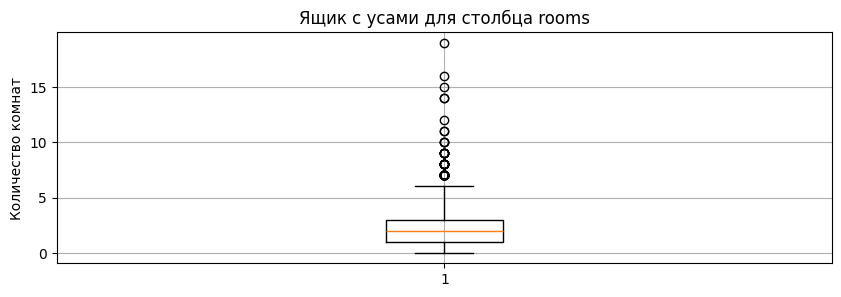

Медианна: 2.0


In [53]:
plt.figure(figsize=(10, 3))
plt.boxplot(data['rooms'])
plt.title('Ящик с усами для столбца rooms')
plt.ylabel('Количество комнат')
plt.grid(True)
plt.show()

print('Медианна:' , data['rooms'].median())

* Медианное количество комнат — две. На диаграмме размаха значения выше 5 комнат отмечены как выбросы. 

Переведу значения столбца в int, так как количество комнат является целочисленным значением

In [54]:
# Изменение типа данных
data['rooms'] = data['rooms'].astype(int)
#data.info() #проверка

### Столбцы  airports_neares, citycenters_nearest, parks_around3000, ponds_around3000 и ponds_nearest, parks_nearest

Не представляется возможным заполнить качественно пропуски в данных столбцах. 
Нет связи между столбцами 'airports_nearest','citycenters_nearest' с тем, является ли местоположение квартиры в Санкт-Петербурге.
Заменю тип данных в столбцах 'ponds_around3000' и  'parks_around3000' на целочисленный (int), пропуски в данных заполню нулями

In [55]:
# Заполнение пропущенных значений 
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# Приведение к типу int
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

# Заполнение пропущенных значений 
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# Приведение к типу int
data['parks_around3000'] = data['parks_around3000'].astype(int)

# data.info()

### Столбец  total_images

In [56]:
data['total_images'].unique()

array([20,  7, 10,  2,  6, 18,  5,  9,  1, 16, 11,  8, 12, 13,  3, 15, 17,
       14,  0, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37], dtype=int64)

Переведу значения столбца в int, так как число фотографий квартиры в объявлении - целочисленное значение

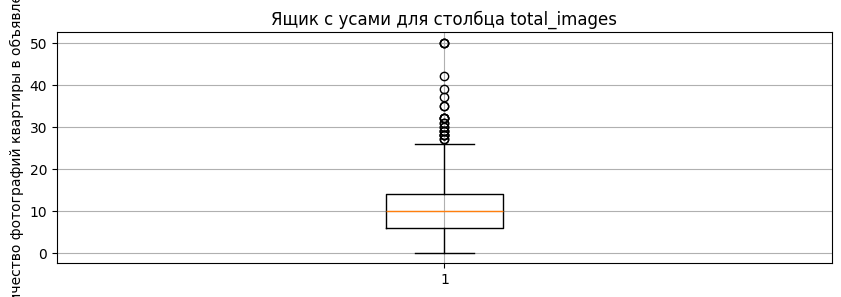

Медианна: 10.0


In [57]:
plt.figure(figsize=(10, 3))
plt.boxplot(data['total_images'])
plt.title('Ящик с усами для столбца total_images')
plt.ylabel('Количество фотографий квартиры в объявлении')
plt.grid(True)
plt.show()

print('Медианна:' , data['total_images'].median())

* Медианное количество фотографий окло 10, больше 25 практически не выставляют.

In [58]:
data['total_images'] = data['total_images'].astype(int)
#data.info() #проверка

### Столбец  'last_price'

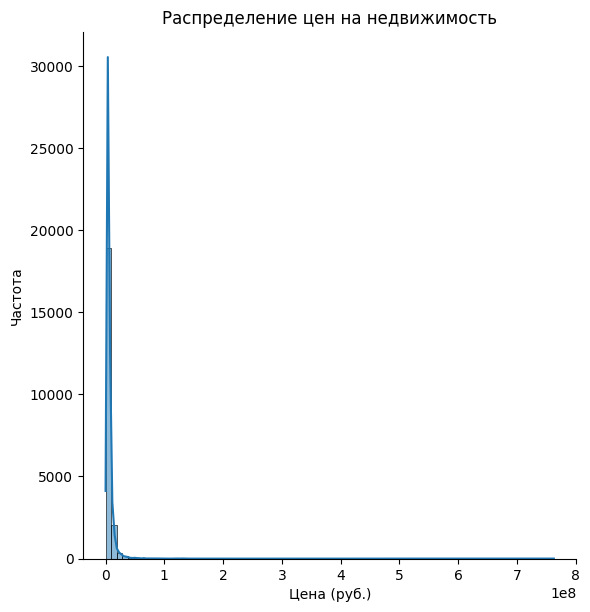

In [59]:
# Визуализация распределения
sns.displot(data=data, x='last_price', bins=80, height=6, kde=True)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Цена (руб.)')
plt.ylabel('Частота')
plt.show()

In [60]:
# Подсчет количества записей, где 'last_price' больше 50,000,000
data.query('last_price > 50000000')['last_price'].count()

114

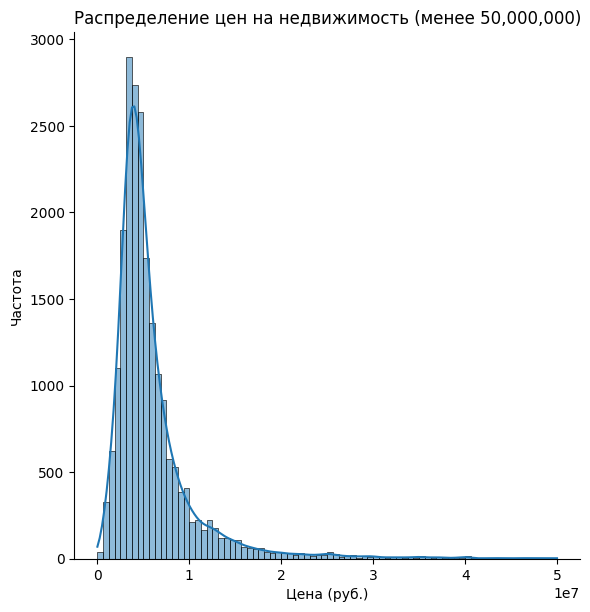

In [61]:
# Визуализация распределения 'last_price' для цен меньше 50,000,000
sns.displot(data=data.query('last_price < 50000000'), x='last_price', bins=80, height=6, kde=True)

plt.title('Распределение цен на недвижимость (менее 50,000,000)')
plt.xlabel('Цена (руб.)')
plt.ylabel('Частота')
plt.show()

Минимальное значение цены: 12190.0
Максимальное значение цены: 763000000.0
Среднее значение цены: 6516068.05


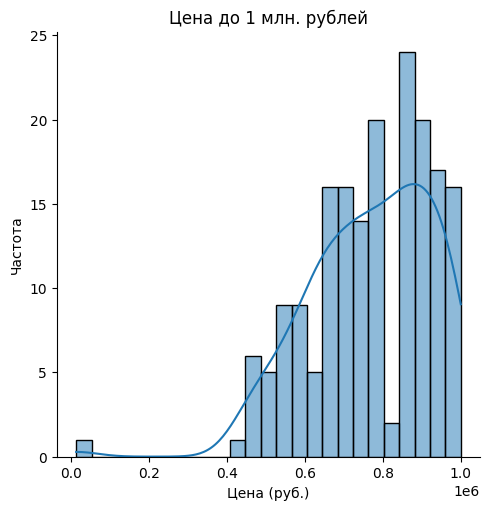

In [62]:
# Фильтруем данные, оставляя только записи с ценой меньше 1 млн рублей
price = data.query('last_price < 1000000')

# Строим гистограмму 
sns.displot(data=price, x='last_price', bins=25, height=5, kde=True)
plt.title('Цена до 1 млн. рублей')
plt.xlabel('Цена (руб.)')
plt.ylabel('Частота')

# Выводим минимальное значение цены
print('Минимальное значение цены:', data['last_price'].min().round(2))
print('Максимальное значение цены:', data['last_price'].max().round(2))
print('Среднее значение цены:', data['last_price'].mean().round(2))

In [63]:
# Фильтруем данные, оставляя только записи с ценой больше 12190 и меньше 50 млн рублей
data = data.query('last_price > 12190')
data = data.query('last_price < 50000000')

# выводим максимальное и среднее значение цен
print(f"Максимальная цена: {data['last_price'].max()}")
print(f"Средняя цена: {data['last_price'].mean()}")

Максимальная цена: 49968900.0
Средняя цена: 5980900.591511936


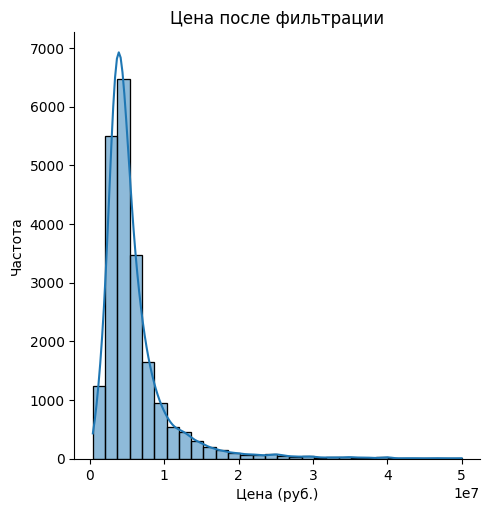

In [64]:
# Строим гистограмму для новых фильтрованных данных
sns.displot(data=data, x='last_price', bins=30, height=5, kde=True)
plt.title('Цена после фильтрации')
plt.xlabel('Цена (руб.)')
plt.ylabel('Частота')
plt.show()

По графику видно, что в столбце 'last_price' есть явно выбивающая аномальная цена 12190тыс.руб., удалю строку. И оставлю только квартиры с ценой до 50млн.рублей: квартиры выше данного ценнового сегмента слишком сильно влияют на графики, их мало и они не являются типичными.

### Вывод 

Были проанализированны пропущенные значения в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

- В столбце ceiling_height были удалены аномальные низкие высоты потолков, пропущенные значения заполнены медианными значениями столбца. 
- В столбце floors_total удалены строки с пропущенными значениями
- В столбце living_area удалены аномальные строки с малой жилой площадью меньше 10кв.м. заполнены пропуски медианными значениями в зависимости от общей площади квартиры.
- Столбец 'is_apartment' должен быть заполнен булевыми значениями. Пропуски заполнены False. Изменен тип данных на bool
- В столбце 'kitchen_area' пропуски заполнены медианными значениями по столбцам 'living_area' и 'total_area', так как имеют логичную корреляцию. 
- В столбце 'balcony' присутствует аномалия: в квартирах с небольшой площадью количество балконов превышает количество комнат. Аномалию не представилось возможным исправить качественно, данный столбец не будет участвовать в конечном анализе.
- В столбце 'locality_name' удалены неявные дубликаты в названиях населенных пунктов. Заполнены пропуски общим названием "Лен.область"
- Было выдвинуто предположение, что в  столбце days_exposition (сколько дней было размещено объявление (от публикации до снятия)) есть пропуски по причине того, что на момент выгрузки данных объявления были еще не сняты. Заменены пропущенные значения разницей между максимальным значением first_day_exposition и значением first_day_exposition. Переведен столбец 'days_exposition' в формат int.
- Столбец 'first_day_exposition' переведен в формат datetime. 
- В столбце 'floor ' значения переведены в int, так как этаж является целочисленным значением
- В столбце 'open_plan' значения переведены в bool. Заменены аномальные значения на False в строках с количеством комнат больше 1.
- В столбце 'studio' изменен тип данных на bool, так как по факту значения имеют булевый тип.
- В столбце 'rooms' переведены значения в int, так как количество комнат является целочисленным значением
- В столбцах 'airports_nearest', 'citycenters_nearest', 'parks_around3000', 'ponds_around3000' и 'ponds_nearest', 'parks_nearest' не представляется возможным заполнить качественно пропуски. Заменены тип данных в столбцах 'ponds_around3000' и 'parks_around3000' на целочисленный (int), пропуски в данных заполнены нулями.
- В столбце 'total_images' переведены значения в int, так как число фотографий квартиры в объявлении - целочисленное значение.
- В столбце 'last_price' удалены аномальные значения и оставлены только квартиры с ценой до 50млн.рублей: квартиры выше данного ценнового сегмента слишком сильно влияют на графики, их мало и они не являются типичными.

### Вычисление и добавление в таблицу новых столбцов

#### Столбец price_per_sqm, цена одного квадратного метра

In [65]:
data['price_per_sqm'] = (data['last_price']/1000)/data['total_area']
#data.info() #проверка

#### Столбец weekday, день недели публикации объявления 

In [66]:
data['weekday'] = data['first_day_exposition'].dt.weekday

#### Столбец month, месяц публикации объявления 

In [67]:
data['month'] = data['first_day_exposition'].dt.month

#### Столбец year, год публикации объявления 

In [68]:
data['year'] = data['first_day_exposition'].dt.year

#### Столбец floor_category, тип этажа квартиры (значения — «первый», «последний», «другой»)

In [69]:
data['floor_category'] = 'другой'
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'

In [70]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Index: 21489 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21489 non-null  int32         
 1   last_price            21489 non-null  float64       
 2   total_area            21489 non-null  float64       
 3   first_day_exposition  21489 non-null  datetime64[ns]
 4   rooms                 21489 non-null  int32         
 5   ceiling_height        21489 non-null  float64       
 6   floors_total          21489 non-null  int32         
 7   living_area           21489 non-null  float64       
 8   floor                 21489 non-null  int32         
 9   is_apartment          21489 non-null  bool          
 10  studio                21489 non-null  bool          
 11  open_plan             21489 non-null  bool          
 12  kitchen_area          21489 non-null  float64       
 13  balcony              

#### Столбец citycenter_km, расстояние в км до центра города

In [71]:
def km(distance):
    # Пробуем разделить расстояние на 1000 и округлить результат
    try:
        return round(distance / 1000)
    # В случае ошибки ничего не делаем
    except:
        pass

In [72]:
data['citycenter_km'] = data['citycenters_nearest'].apply(km)

In [73]:
data['citycenter_km'].head() #проверка

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: citycenter_km, dtype: float64

#### Вывод

- Добавлен столбец price_per_sqm, цена одного квадратного метра
- Добавлен столбец weekday, день недели публикации объявления
- Добавлен столбец month, месяц публикации объявления
- Добавлен столбец year, год публикации объявления
- Добавлен столбец floor_category, тип этажа квартиры (значения — «первый», «последний», «другой»)
- Добавлен столбец citycenter_km, расстояние в км до центра города

## Исследовательский анализ данных

### Столбцы total_area, living_area, kitchen area

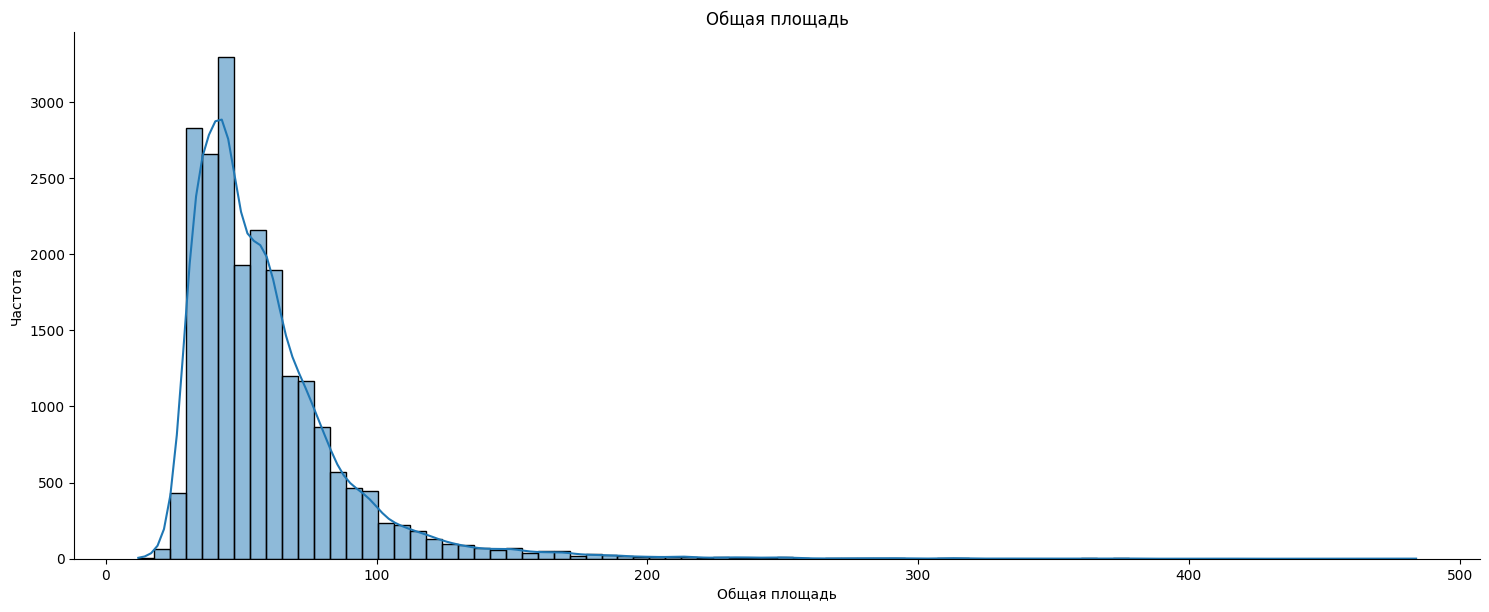

In [74]:
sns.displot(data=data, x='total_area', kde=True, bins = 80, height= 6 , aspect= 2.5);
plt.title('Общая площадь')
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.show()

In [75]:
print("Медиана общей площади:", data['total_area'].median())
print("Максимальное значение общей площади:", data['total_area'].max())

Медиана общей площади: 52.0
Максимальное значение общей площади: 483.9


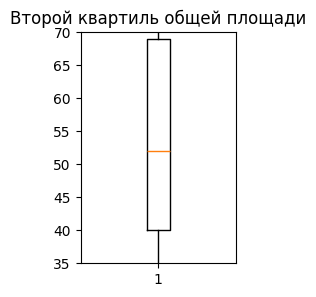

In [76]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['total_area'])
plt.ylim(35, 70)
plt.title('Второй квартиль общей площади');
pass

Столбец с общей площаью имеет несимметричное распределение. Пик - медианное значение на площади 52кв.м - самая распространенная площадь квартир. Большая часть квартир площадью - 40-70кв.м. Распределение правостороннее: достаточно много квартир площадью 12-40 кв.м. и большой разброс немногочисленных квартир с площадью 200-480 кв.м, создающих длинный хвост. 

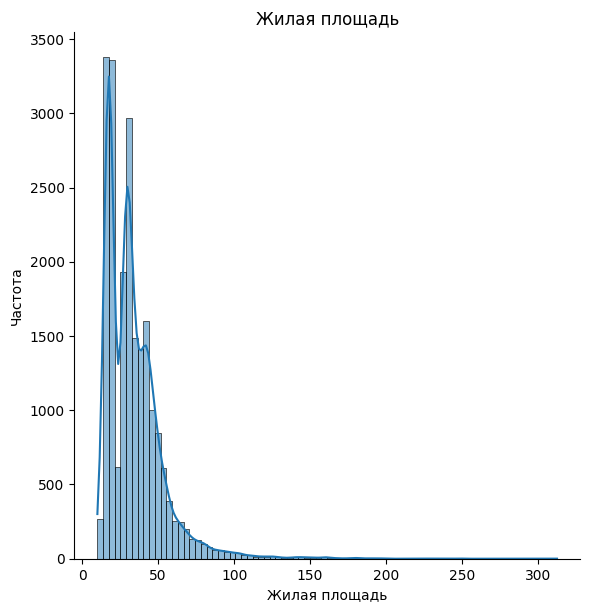

Медиана жилой площади: 30.0


In [77]:
sns.displot(data=data, x='living_area', bins=80, height= 6, kde=True)
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь')
plt.ylabel('Частота')
plt.show()

print("Медиана жилой площади:", data['living_area'].median())

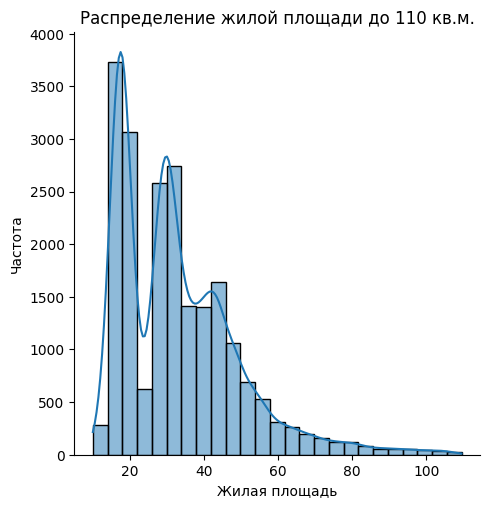

In [78]:
living = data.query('living_area<110')
sns.displot(data=living, x='living_area', bins=25, height= 5, kde=True)
plt.title('Распределение жилой площади до 110 кв.м.')
plt.xlabel('Жилая площадь')
plt.ylabel('Частота')
plt.show();

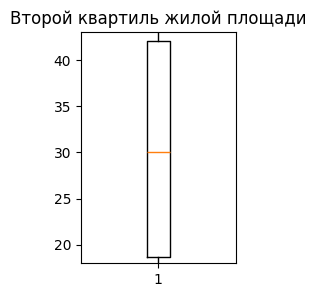

In [79]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['living_area'])
plt.title('Второй квартиль жилой площади');
plt.ylim(18, 43)
pass

Столбец с жилой площаью имеет три пиковых значения: 18, 30 (медиана) и 43 кв.м. Большой разброс немногочисленных квартир с жилой площадью до 150 кв.м, создающих длинный хвост.

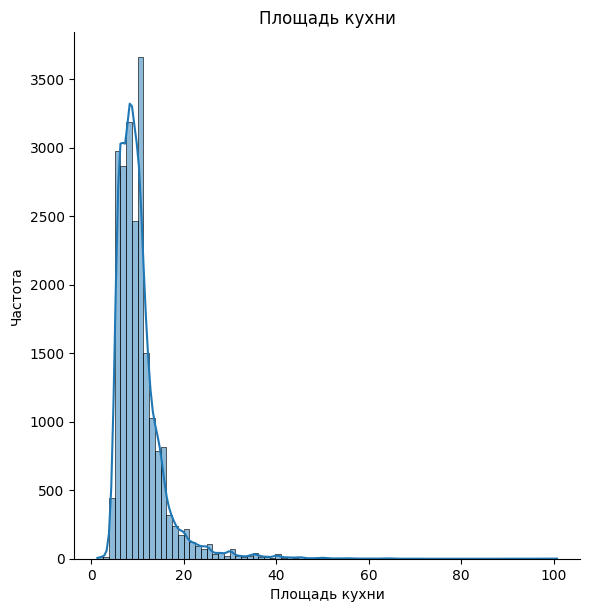

Максимальное значение площади кухни: 100.7
Медиана площади кухни: 9.0


In [80]:
sns.displot(data=data, x='kitchen_area', bins=80, height= 6, kde=True)
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Частота')
plt.show()

print("Максимальное значение площади кухни:", data['kitchen_area'].max())
print("Медиана площади кухни:", data['kitchen_area'].median())

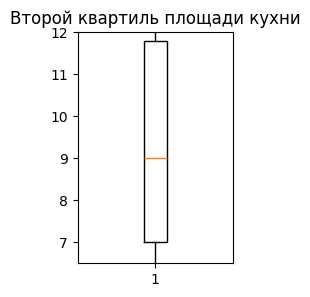

In [81]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['kitchen_area'])
plt.ylim(6.5, 12)
plt.title('Второй квартиль площади кухни');
pass

Распространенные значения площади кухни 7-12 кв.м., медиана - 9 кв.м.

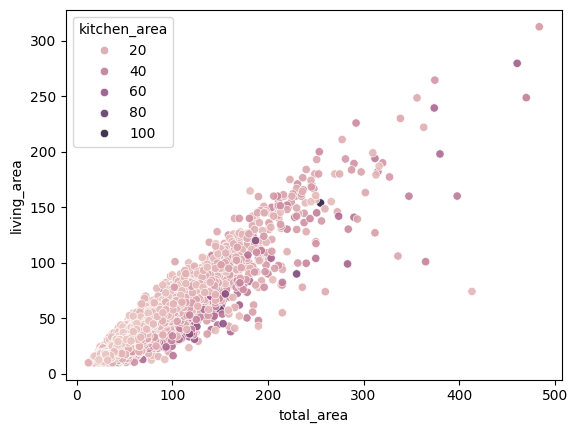

In [82]:
sns.scatterplot(data=data, x='total_area', y='living_area',hue='kitchen_area',  alpha=0.9);

Столбцы  total_area, living_area, kitchen area имеют логичную корреляцию.

### Столбец last_price

Переведу значения столбца из рублей в млн.рублей для удобства 

In [83]:
data['last_price'] = data['last_price']/1000000 

In [84]:
print('median=', data['last_price'].median())
print('min=', data['last_price'].min())
print('max=', data['last_price'].max())
print('mode=', data['last_price'].mode())

median= 4.65
min= 0.43
max= 49.9689
mode= 0    4.5
Name: last_price, dtype: float64


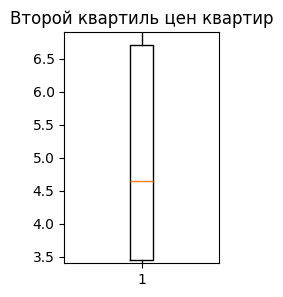

In [85]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['last_price'])
plt.ylim(3.4, 6.9)
plt.title('Второй квартиль цен квартир');
pass

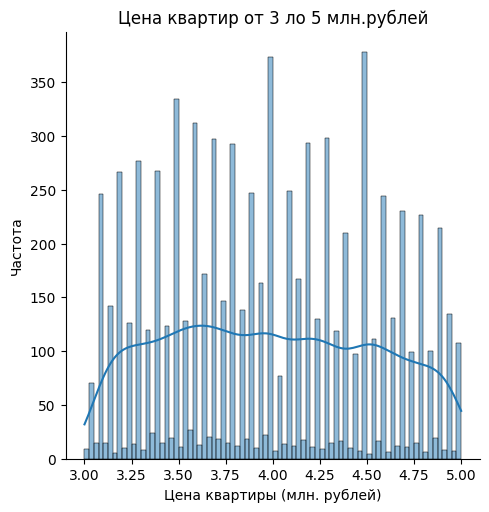

In [86]:
price = data.query('last_price>3 & last_price<5')
sns.displot(data=price, x='last_price', bins=80, height=5, kde=True)
plt.title('Цена квартир от 3 ло 5 млн.рублей')
plt.xlabel('Цена квартиры (млн. рублей)')
plt.ylabel('Частота')
plt.show()

In [87]:
price_45 = data.query('last_price == 4.5')
print('среднее total_area на квартиры за 4,5млн рублей = ', price_45['total_area'].median());
print('среднее rooms на квартиры за 4,5млн рублей = ', price_45['rooms'].median())
print('')
price_40 = data.query('last_price == 4')
print('cреднее total_area на квартиры за 4 млн рублей = ', price_40['total_area'].median())
print('среднее rooms на квартиры за 4 млн рублей = ', price_40['rooms'].median())
print('')
price_35 = data.query('last_price == 3.5')
print('среднее total_area на квартиры за 3,5млн рублей = ', price_35['total_area'].median())
print('среднее rooms на квартиры за 3,5млн рублей = ', price_35['rooms'].median())

среднее total_area на квартиры за 4,5млн рублей =  46.6
среднее rooms на квартиры за 4,5млн рублей =  2.0

cреднее total_area на квартиры за 4 млн рублей =  45.0
среднее rooms на квартиры за 4 млн рублей =  2.0

среднее total_area на квартиры за 3,5млн рублей =  41.0
среднее rooms на квартиры за 3,5млн рублей =  1.0


Cтоимость квартир варируется от 430тыс.руб. до 49,9 млн.руб. Самый частый встречаемый диапазон цен на квартир - примерно 3,5-7 млн.рублей. Самые распространенные цены за квартиру: на двухкомнатную 45-46кв.м. - 4 и 4,5 млн.руб., за однокомнатную 41кв.м. 3.5 млн.рублей

### Столбец rooms

median= 2.0
min= 0
max= 19
mode= 0    1
Name: rooms, dtype: int32


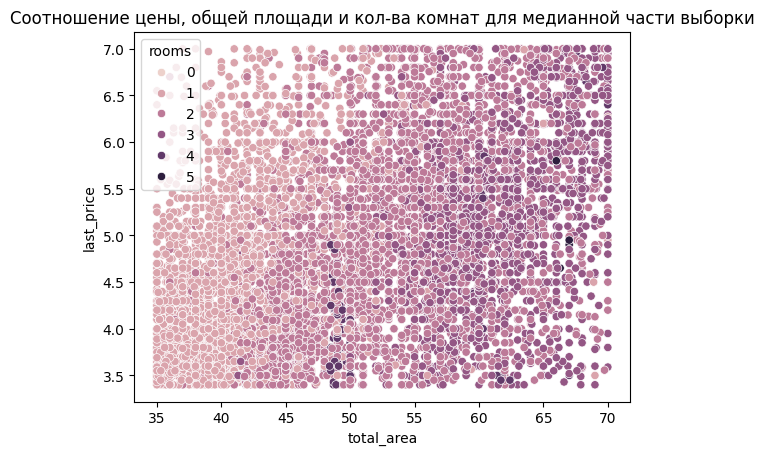

In [88]:
print('median=', data['rooms'].median())
print('min=', data['rooms'].min())
print('max=', data['rooms'].max())
print('mode=', data['rooms'].mode())
median = data.query('last_price>=3.4 & last_price<=7.0 & total_area>=35 & total_area<= 70')
sns.scatterplot(data=median, x='total_area', y='last_price',hue='rooms',  alpha=1);
plt.title('Соотношение цены, общей площади и кол-ва комнат для медианной части выборки');

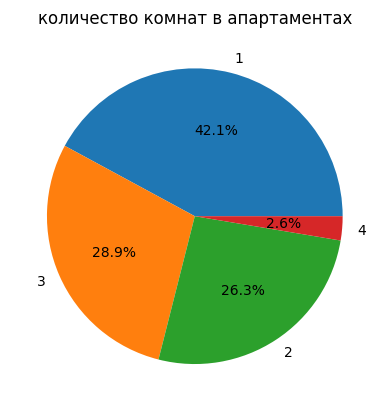

In [89]:
rooms_ap = data[data['is_apartment'] == 1]['rooms'].value_counts() #кол-во комнат в апартаментах 
plt.pie(rooms_ap, labels=rooms_ap.index, autopct='%.1f%%');
plt.title('количество комнат в апартаментах');

In [90]:
data[data['studio'] == 1]['rooms'].value_counts() #кол-во комнат в студии 

rooms
0    54
1     5
Name: count, dtype: int64

In [91]:
data[data['open_plan'] == 1]['rooms'].value_counts() #кол-во комнат в студии 

rooms
0    55
Name: count, dtype: int64

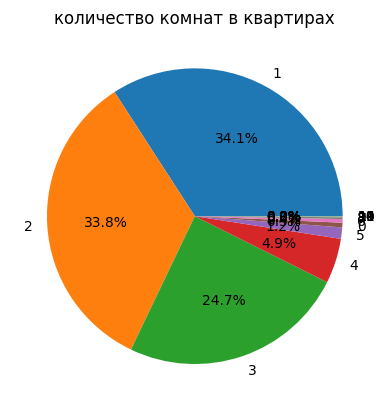

In [92]:
rooms = data['rooms'].value_counts() #кол-во комнат в квартирах
plt.pie(rooms, labels=rooms.index, autopct='%.1f%%');
plt.title('количество комнат в квартирах');

В основном, в таблице представлены однокомнатные (34,1%) и двухкомнатные квартиры (33,7%), реже трехкмонатные (24.8%) и четырехкомнатные (4.9%). В студиях и в квартирах со свободной планировкой 0 комнат. Максимальное количество комнат в квартире: 19. Апартаменты встречаются однокомнатные (43,2%), двухкомнатные(37%) и трехкомнатные(29,7%), и есть одни пятикомнатные.

Квартиры площадью до 40кв.м, в основном, однокомнатные. 40-50 кв.м. - двухкомнатные. 50-60 кв.м. двух-трехкомнатные, 60-70 кв.м трехкомнатные. 

### Столбец ceiling_height 

In [93]:
print('median=', data['ceiling_height'].median())
print('min=', data['ceiling_height'].min())
print('max=', data['ceiling_height'].max())
print('mode=', data['ceiling_height'].mode())

median= 2.65
min= 2.4
max= 5.8
mode= 0    2.65
Name: ceiling_height, dtype: float64


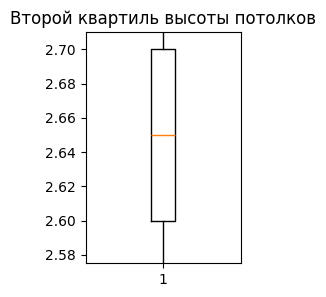

In [94]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['ceiling_height'])
plt.ylim(2.575, 2.71)
plt.title('Второй квартиль высоты потолков');
pass

Средняя высота потолков 2.65м, минимальная 2,4, максимальная 5,8 м. Средний диапазон высот: 2,6 - 2,7 м. 

### Столбец floor

In [95]:
print('median=', data['floor'].median())
print('min=', data['floor'].min())
print('max=', data['floor'].max())
print('mode=', data['floor'].mode())

median= 4.0
min= 1
max= 33
mode= 0    2
Name: floor, dtype: int32


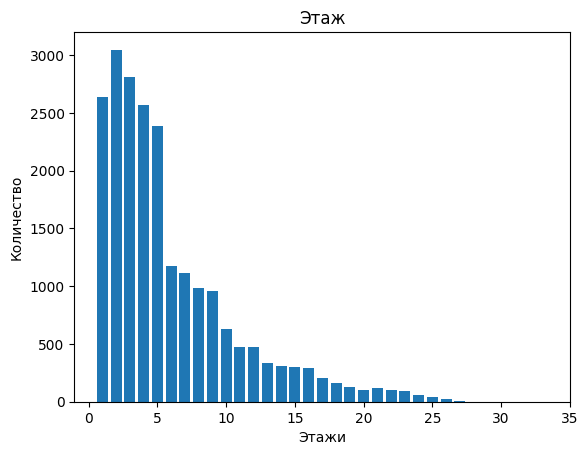

In [96]:
floor = data['floor'].value_counts()
plt.bar(floor.index, floor);
plt.title('Этаж')
plt.xlabel('Этажи')
plt.ylabel('Количество')
plt.show()

In [97]:
def categorize_floor(floor):
    try:
        if 1 <= floor <= 5:
            return 'до 5 этажа'
        elif 5 < floor <= 10:
            return '5-10 этаж'
        elif 10 < floor <= 15:
            return '5-15 этаж'
        elif 15 < floor <= 20:
            return '15-20 этаж'
        elif floor >= 20:
            return 'другой'
    except:
        pass

In [98]:
# Применяем функцию categorize_floor 
total_floor_category = data['floor'].apply(categorize_floor)

# Подсчитываем количество этажей в каждой категории
total_floor_category = total_floor_category.value_counts()

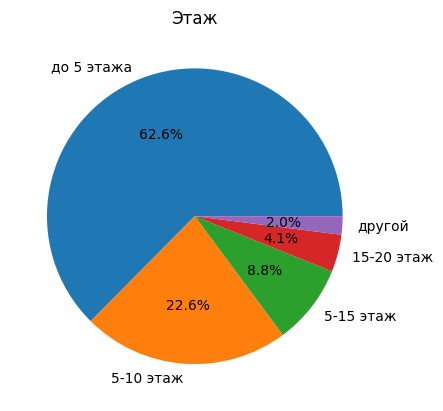

In [99]:
plt.pie(total_floor_category, labels=total_floor_category.index, autopct='%.1f%%');
plt.title('Этаж');

В основном, квартиры расплогаются до 5 этажа 62.5%, реже на 5-10 этажах 22,6%, на 5-15 этажах 8,8%. На 15-20 этажах уже только 4.1%, выше 20 этажа лишь 2% всех квартир в данных. Максимальный этаж 33. 

### Столбец floor_category

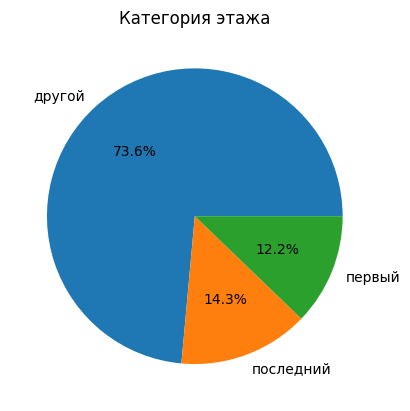

In [100]:
floor_category = data['floor_category'].value_counts()
floor_category
plt.pie(floor_category, labels=floor_category.index, autopct='%.1f%%');
plt.title('Категория этажа');

На первом этаже распологаются 12,2% квартир в данных, на последнем 14,3%, на остальных 73,5% всех квартир

### Столбец floors_total

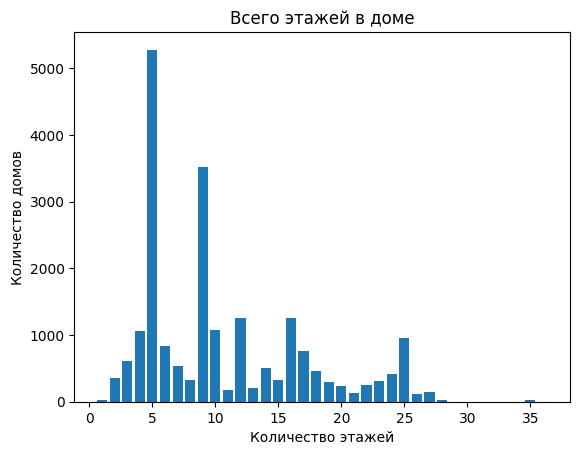

In [101]:
# Подсчитываем количество домов по количеству этажей
floors_total = data['floors_total'].value_counts()

plt.bar(floors_total.index, floors_total)
plt.title('Всего этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.show()

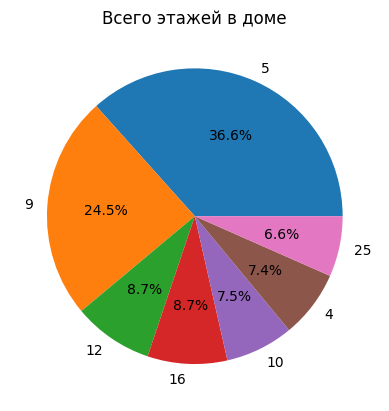

In [102]:
# топ 7 высот этажей
floors_total = data['floors_total'].value_counts().head(7)
plt.pie(floors_total, labels = floors_total.index, autopct='%.1f%%');
plt.title('Всего этажей в доме');

Большинство домов в выборке пятиэтажные и девятиэтажные

### Столбец cityсenters_nearest

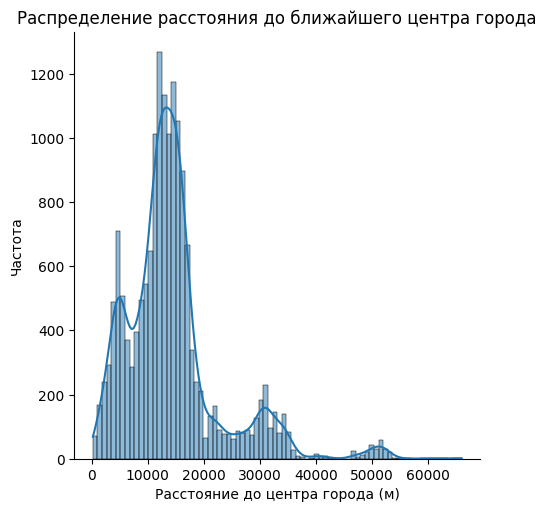

In [103]:
# Распределение для расстояния до ближайшего центра города
sns.displot(data=data, x='citycenters_nearest', bins=80, height=5, kde=True)
plt.title('Распределение расстояния до ближайшего центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Частота')
plt.show()

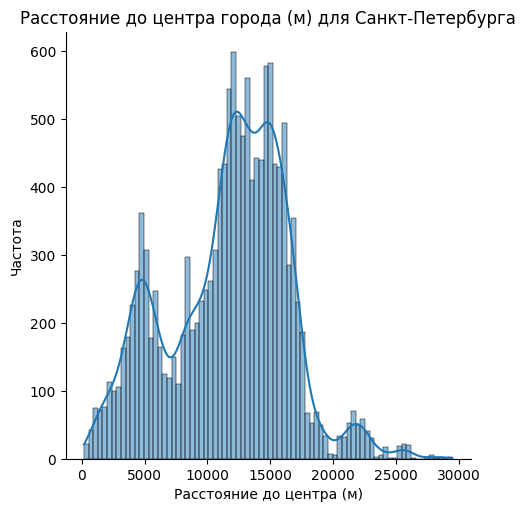

In [104]:
# Фильтруем данные для Санкт-Петербурга
city_sp = data[data['locality_name'] == 'Санкт-Петербург']['citycenters_nearest']

# Создаем распределение для расстояния до центра города в Санкт-Петербурге
sns.displot(data=city_sp, bins=80, height=5, kde=True)
plt.title('Расстояние до центра города (м) для Санкт-Петербурга')
plt.xlabel('Расстояние до центра (м)')
plt.ylabel('Частота')
plt.show()

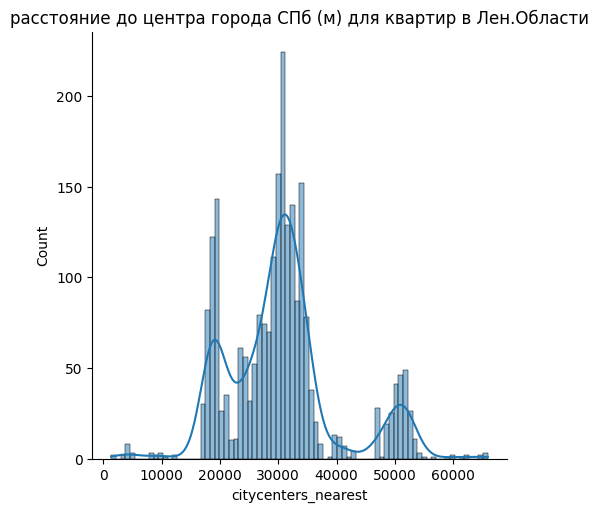

In [105]:
city_lo = data[data['locality_name'] != 'Санкт-Петербург']['citycenters_nearest']
sns.displot(data=city_lo,  bins=80, height=5, kde=True);
plt.title('расстояние до центра города СПб (м) для квартир в Лен.Области');

In [106]:
# Фильтруем данные, исключая Санкт-Петербург и выбирая города с расстоянием до ближайшего центра города 
# в диапазоне от 18000 до 20000 метров
city_lo_20 = data.query('locality_name != "Санкт-Петербург" & citycenters_nearest>18000 & citycenters_nearest<20000')

# Получаем три наиболее распространённых названия населённых пунктов в отфильтрованном наборе данных
city_lo_20['locality_name'].value_counts().head(3)

locality_name
Парголово    196
Шушары       125
Name: count, dtype: int64

In [107]:
# Фильтруем данные, исключая Санкт-Петербург и выбирая города с расстоянием до ближайшего центра города 
# в диапазоне от 25000 до 40000 метров
city_lo_30 = data.query('locality_name != "Санкт-Петербург" & citycenters_nearest>25000 & citycenters_nearest<40000')

# Получаем три наиболее распространённых названия населённых пунктов в отфильтрованном наборе данных
city_lo_30['locality_name'].value_counts().head(3)

locality_name
Колпино    327
Пушкин     326
Шушары     171
Name: count, dtype: int64

In [108]:
# Фильтруем данные, выбирая города с расстоянием до ближайшего центра города более 48000 метров
city_lo_50 = data.query('citycenters_nearest>48000')

# Получаем три наиболее распространённых названия населённых пунктов в отфильтрованном наборе данных
city_lo_50['locality_name'].value_counts().head(3)

locality_name
Ломоносов      120
Кронштадт       61
Зеленогорск     24
Name: count, dtype: int64

Самые распространнные расстояния от центра города для квартир в Санкт-Петербурге - это 5км, 8км и примерно 12-18км. 
Квартиры в Ленинградской области, в основном, находятся на расстояние от центра СПб: 18-19км (Парголово, Шушары), 30-35км (Колпино, Пушкин) и 50 км - Ломоносов. 

### Столбец airports_nearest

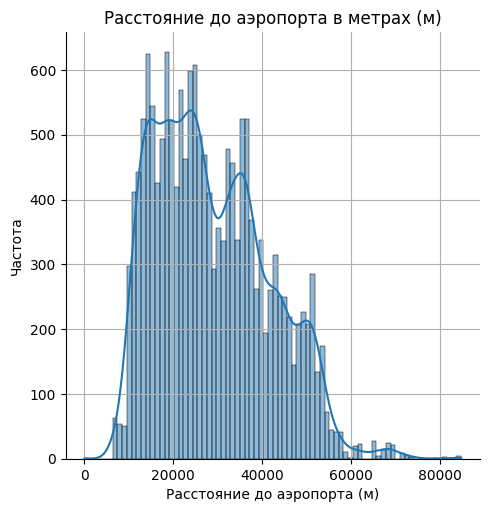

In [109]:
sns.displot(data=data, x='airports_nearest', bins=80, height=5, kde=True)
plt.title('Расстояние до аэропорта в метрах (м)')
plt.xlabel('Расстояние до аэропорта (м)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [110]:
# Фильтруем данные, выбирая населённые пункты с расстоянием до ближайшего аэропорта в диапазоне от 15000 до 30000 метров
airport_1 = data.query('airports_nearest>15000 & airports_nearest<=30000')

# Получаем все названия населённых пунктов в отфильтрованном наборе данных и их частоты
airport_1['locality_name'].value_counts().head()

locality_name
Санкт-Петербург    5913
Колпино             319
Шушары              212
Пушкин              203
Красное Село        156
Name: count, dtype: int64

In [111]:
# Фильтруем данные, выбирая населённые пункты с расстоянием до ближайшего аэропорта в диапазоне от 30000 до 40000 метров
airport_2 = data.query('airports_nearest>30000 & airports_nearest<=40000')

# Получаем четыре наиболее распространённых названия населённых пунктов в отфильтрованном наборе данных
airport_2['locality_name'].value_counts().head(4)

locality_name
Санкт-Петербург    3654
Петергоф            128
Понтонный            12
Красное Село          8
Name: count, dtype: int64

In [112]:
# Фильтруем данные, выбирая населённые пункты с расстоянием до ближайшего аэропорта более 40000 метров
airport_3 = data.query('airports_nearest>40000')

# Получаем четыре наиболее распространённых названия населённых пунктов в отфильтрованном наборе данных
airport_3['locality_name'].value_counts().head(4)

locality_name
Санкт-Петербург    2509
Парголово           300
Сестрорецк          167
Ломоносов           129
Name: count, dtype: int64

In [113]:
# Вычисляем процент заполнения столбца 'airports_nearest' для Санкт-Петербурга
a = data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].count() / (data['locality_name'].count()) * 100

# Выводим результат с округлением до двух знаков после запятой
print('Процент заполнения столбца для Санкт-Петербурга =', a.round(2))

Процент заполнения столбца для Санкт-Петербурга = 66.43


In [114]:
# Находим максимальное значение расстояния до ближайшего аэропорта для Санкт-Петербурга
data.query("locality_name == 'Санкт-Петербург'")['airports_nearest'].max()

54784.0

Расстояния до аэропорта в столбце 'airports_nearest' в основном заполнены для Санкт-Петербурга (66.5%), для большинства квартир это примерно 15-30км, максимум 54,8км. Среди других городов в расстоянии до 30 км от аэропорта лидируют по количеству объявлений: Колпино, Шушары, Пушкин. От 30-40км - Петергоф, свыше 40км - Парголово.

### Столбец parks_nearest

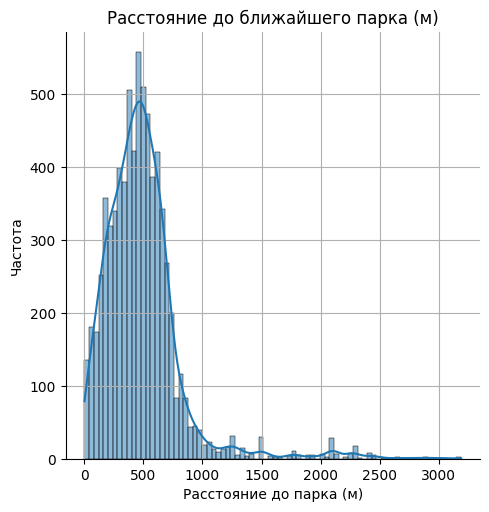

In [115]:
sns.displot(data=data, x='parks_nearest', bins=80, height=5, kde=True)
plt.title('Расстояние до ближайшего парка (м)')
plt.xlabel('Расстояние до парка (м)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [116]:
# Фильтруем данные, выбирая пруды, находящиеся в пределах 1000 метров от ближайших парков
ponds = data.query('parks_nearest < 1000')

# Считаем количество уникальных названий местностей и выводим 5 самых популярных
ponds['locality_name'].value_counts().head()

locality_name
Санкт-Петербург    6304
Пушкин              201
Петергоф            130
Колпино             115
Кронштадт            82
Name: count, dtype: int64

Зачастую, в объявлениях указывают расстояние до ближайшего парка, когда это расстояние до 1км. Чаще всего это 400-700м, в таких локациях как: Санкт-Петербург, Пушкин, Петергоф, Колпино и Кронштадт. 

### Столбец 'ponds_nearest'

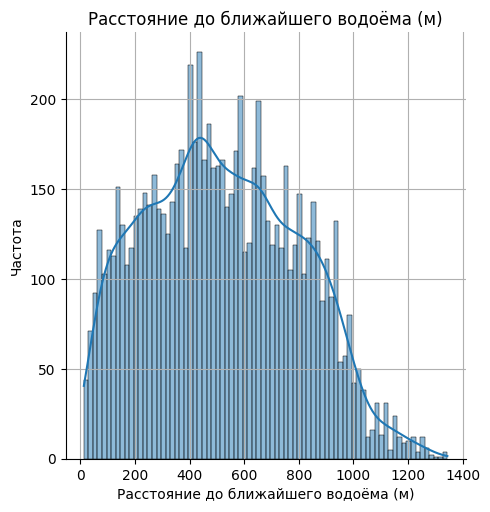

In [117]:
sns.displot(data=data, x='ponds_nearest', bins=80, height=5, kde=True);
plt.title('Расстояние до ближайшего водоёма (м)')
plt.xlabel('Расстояние до ближайшего водоёма (м)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [118]:
# Фильтруем данные, выбирая пруды, находящиеся в пределах 700 метров от ближайших прудов
ponds = data.query('ponds_nearest < 700')

# Считаем количество уникальных названий местностей и выводим 5 самых популярных
ponds['locality_name'].value_counts().head()

locality_name
Санкт-Петербург    5084
Колпино             135
Пушкин              132
Шушары              116
Сестрорецк          109
Name: count, dtype: int64

Зачастую, в объявлениях указывают расстояние до ближайшего водоема, когда это расстояние до 1км. Чаще всего это 400-700м, в таких локациях как: Санкт-Петербург, Колпино, Пушкин, Шушары и Сестрорецк. 

### День и месяц публикации объявления

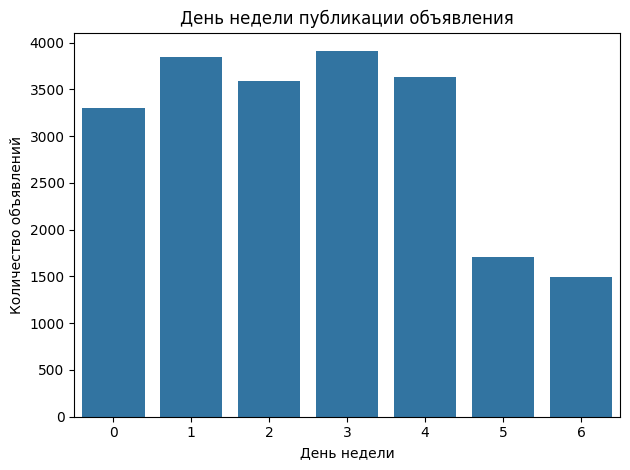

In [119]:
sns.countplot(data=data, x='weekday');
plt.title('День недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.tight_layout()
plt.show()

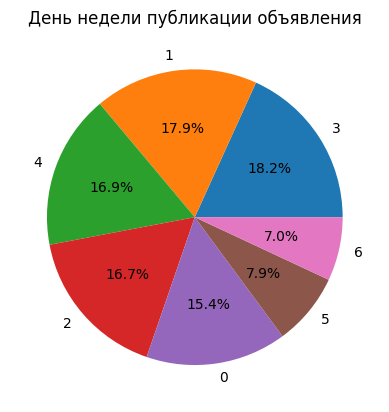

In [120]:
weekday = data['weekday'].value_counts()
plt.pie(weekday, labels = weekday.index, autopct='%.1f%%');
plt.title('День недели публикации объявления');

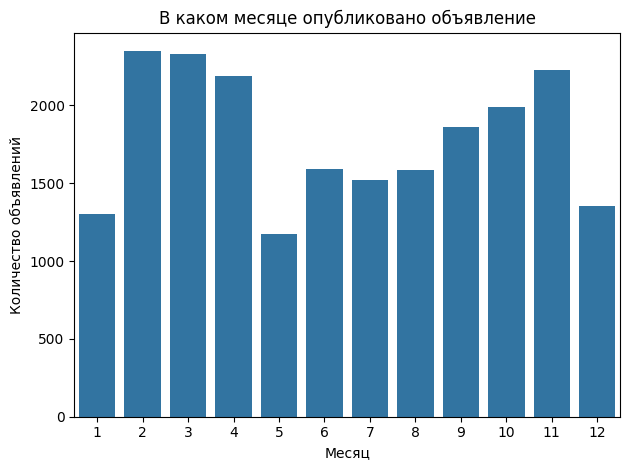

In [121]:
sns.countplot(data=data, x='month');
plt.title('В каком месяце опубликовано объявление')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.tight_layout()
plt.show()

In [122]:
data['month'].value_counts().head()

month
2     2351
3     2332
11    2230
4     2189
10    1993
Name: count, dtype: int64

Чаще всего объявления публикуют в будние дни: в четверг (18,2%), вторник (17.9%), чуть реже в среду или пятницу: 16,9% и 16,7% соответственно.

Пик публикаций объявлений приходится на февраль. Дальше активность немного падает в марте и апреле. В мае публикуются минимум объявлений, затем снова рост и в ноябре поднимается почти до отметок начала года и снова резкий спад в декабре. 
Небольшое количество объявлений в декабре и январе можно объяснить новогодними праздниками, а спад с мая по август - майскими праздниками и сезоном отпусков. 

### Cколько дней было размещено объявление (от публикации до снятия)

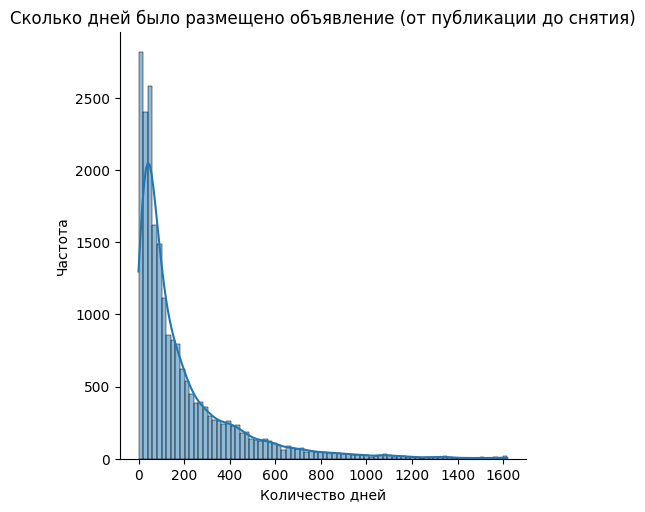

In [123]:
sns.displot(data=data, x='days_exposition', bins=80, height=5, kde=True);
plt.title('Cколько дней было размещено объявление (от публикации до снятия)')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

In [124]:
print('Среднее количество дней до снятия объвления', data['days_exposition'].mean())

Среднее количество дней до снятия объвления 189.1201079622132


In [125]:
print('Медианное количество дней до снятия объвления', data['days_exposition'].median())

Медианное количество дней до снятия объвления 99.0


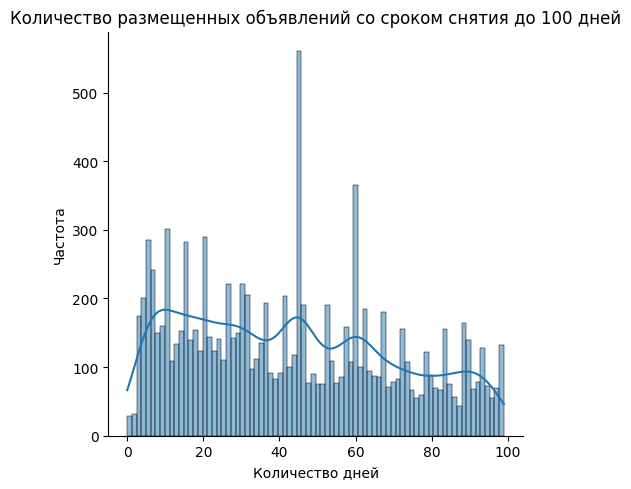

days_exposition
45    561
60    366
7     242
30    221
4     200
Name: count, dtype: int64


In [126]:
days_exposition_min100 = data.query('days_exposition < 100')
sns.displot(data=days_exposition_min100, x='days_exposition', bins=80, height=5, kde=True)
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.title('Количество размещенных объявлений со сроком снятия до 100 дней')
plt.tight_layout()
plt.show()

# Показать количество размещенных объявлений
top_days_exposition = data['days_exposition'].value_counts().head()
print(top_days_exposition)

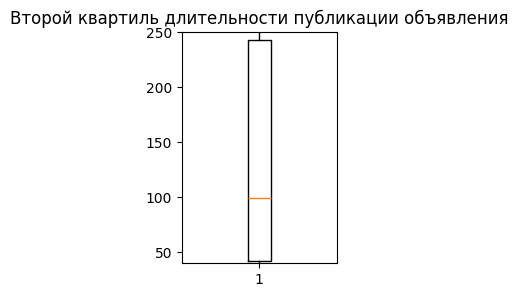

In [127]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['days_exposition'])
plt.ylim(40, 250)
plt.title('Второй квартиль длительности публикации объявления');
pass

Продажа квартиры обычно занимает около 3-4 месяцев, в основном, до 60 дней. В норме до 100 дней. Быстрые продажи: до 45 дней, необычно долгие от 4 месяцев. 

### Факторы, влияющие на общую (полную) стоимость объекта

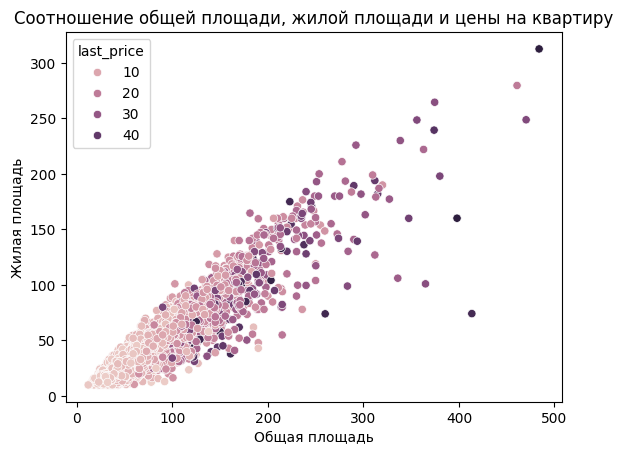

In [128]:
sns.scatterplot(data=data, x='total_area', y='living_area', hue='last_price', alpha=1)
plt.xlabel('Общая площадь')
plt.ylabel('Жилая площадь')
plt.title('Соотношение общей площади, жилой площади и цены на квартиру')
plt.show()

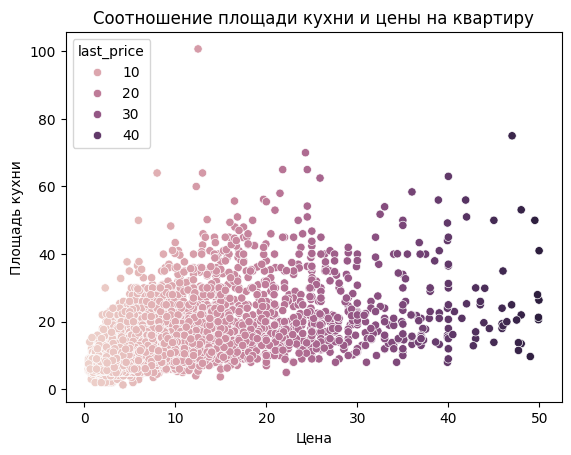

In [129]:
sns.scatterplot(data=data, x='last_price', y='kitchen_area', hue='last_price', alpha=1)
plt.xlabel('Цена')
plt.ylabel('Площадь кухни')
plt.title('Соотношение площади кухни и цены на квартиру')
plt.show()

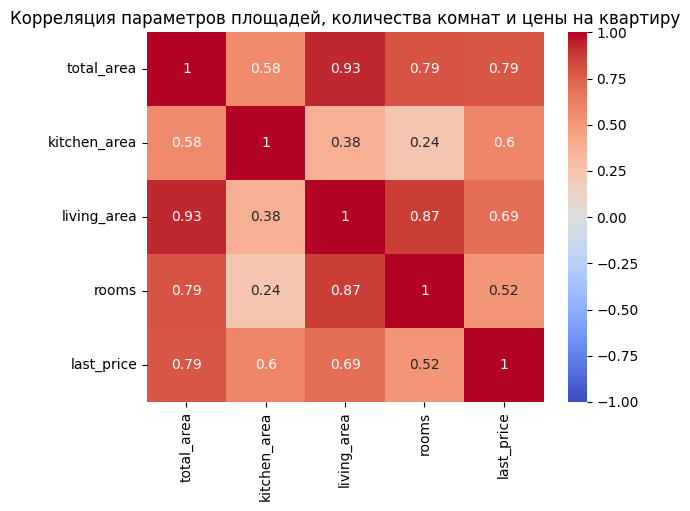

In [130]:
data_corr = data[['total_area','kitchen_area', 'living_area', 'rooms', 'last_price']].copy()
sns.heatmap(data_corr.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.title('Корреляция параметров площадей, количества комнат и цены на квартиру');

Общая площадь и жилая площадь имеют прямую корреляцию, так что можно сказать, что это один и тот же параметр, влиияющий на стоимость квартиры. 

In [131]:
# Создание сводной таблицы для вычисления средней цены квартир по категориям этажей
pd.pivot_table(
    data=data,
    index='floor_category',
    values='last_price',
    aggfunc='mean').round(2)

,last_price
floor_category,
другой,6.21
первый,4.68
последний,5.91


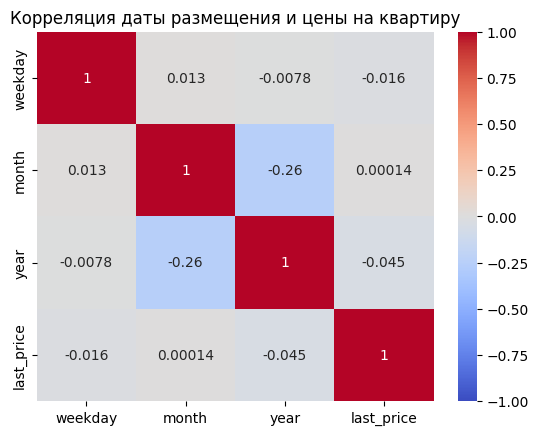

In [132]:
data_corr_day = data[['weekday','month', 'year','last_price']].copy()
sns.heatmap(data_corr_day.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.title('Корреляция даты размещения и цены на квартиру');

In [133]:
# Создание сводной таблицы для вычисления средней цены и количества объявлений по дням недели
pd.pivot_table(
    data=data,
    index='weekday',
    values='last_price',
    aggfunc={'mean','count'}).sort_values('mean', ascending=False).round(2)

,count,mean
weekday,,
3,3913,6.19
0,3307,6.07
2,3595,6.03
1,3845,5.99
6,1495,5.89
4,3629,5.78
5,1705,5.75


In [134]:
# Создание сводной таблицы для вычисления средней цены и количества объявлений по годам
pd.pivot_table(
    data=data,
    index='year',
    values='last_price',
    aggfunc={'mean','count'}).sort_values('mean', ascending=False).round(2)

,count,mean
year,,
2014,127,10.57
2015,1098,7.11
2019,2655,6.23
2016,2623,6.02
2017,7561,5.89
2018,7425,5.72


In [135]:
# Создание сводной таблицы для вычисления средней площади и количества объявлений по годам
pd.pivot_table(
    data=data,
    index='year',
    values='total_area',
    aggfunc={'mean', 'count'}).sort_values('mean', ascending=False)

,count,mean
year,,
2014,127,81.385276
2015,1098,68.565000
2016,2623,60.707480
2017,7561,59.313194
2019,2655,57.807326
2018,7425,57.200380


In [136]:
# Создание сводной таблицы для вычисления средней цены за квадратный метр по годам
price_per_sqm_year = pd.pivot_table(
   data=data,
   index='year',
   values='price_per_sqm',
   aggfunc={'mean'}).sort_values('year')
price_per_sqm_year

,mean
year,
2014,119.942807
2015,98.839201
2016,95.429958
2017,95.496027
2018,97.347534
2019,104.462155


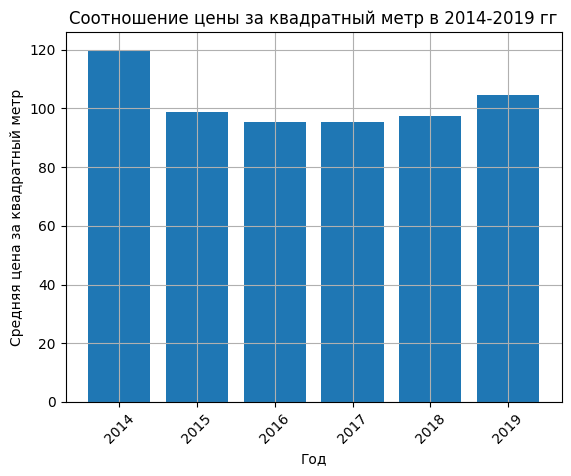

In [137]:
# Преобразование сводной таблицы в серию для построения графика
my_series = price_per_sqm_year.squeeze()

# Построение столбчатой диаграммы
plt.bar(my_series.index, my_series)
plt.title('Соотношение цены за квадратный метр в 2014-2019 гг')
plt.xlabel('Год')
plt.ylabel('Средняя цена за квадратный метр')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Больше всего на цену влияет общая площадь квартиры, корреляция составляет 0,79. Площадь кухни никак не влият на конечную стоимость. 

День недели выбранный для публикации объявления может повлиять на стоимость квартиры на 0,07%, выше всего стоимость в среду. 

В период с 2014-2018 год стоимость квартир на продажу снизилось примерно на 54%, но общая площадь квартир на рынке также уменьшилось на 70%. Скачки цен за кв.м. за этот период не повлиял на показатели.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [138]:
# Создание сводной таблицы для вычисления средней цены за квадратный метр и количества объявлений по населенным пунктам
locality_name_max10 = pd.pivot_table(
   data=data,
   index=('locality_name'),
   values='price_per_sqm',
   aggfunc={'mean','count'}).sort_values('count', ascending=False).head(10)
# Сортировка по средней цене за квадратный метр
locality_name_max10 = locality_name_max10['mean'].sort_values(ascending=False)
locality_name_max10

locality_name
Санкт-Петербург    111.481474
Пушкин             103.428484
Кудрово             95.461482
Парголово           90.549618
Мурино              86.245925
Петергоф            84.480970
Шушары              78.470324
Колпино             75.344096
Всеволожск          68.936434
Гатчина             68.627364
Name: mean, dtype: float64

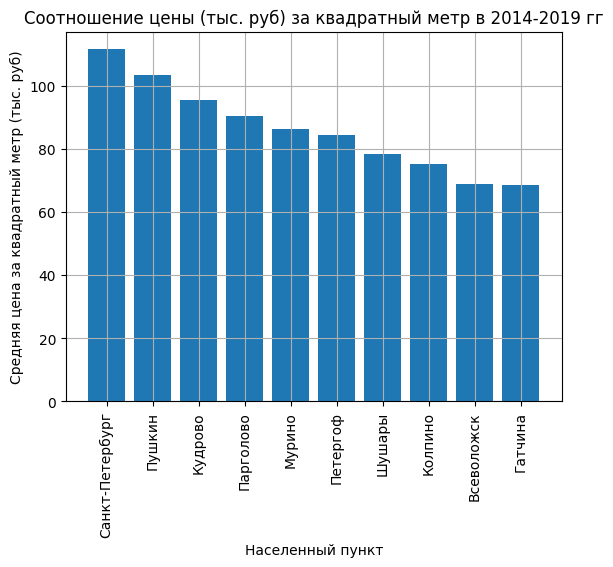

In [139]:
# Построение столбчатой диаграммы для средней цены за квадратный метр по населенным пунктам
plt.bar(locality_name_max10.index, locality_name_max10)
plt.title('Соотношение цены (тыс. руб) за квадратный метр в 2014-2019 гг')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена за квадратный метр (тыс. руб)')
plt.grid()
plt.xticks(rotation=90)
plt.show()

Самая высокая цена за квадратный метр в Санкт-Петербурге (111.49тыс.руб/кв.м), самая низкая в Гатчине (68.64тыс.руб/кв.м)

### Средняя цена за километр 

In [140]:
# Создание сводной таблицы для вычисления медианной цены за квадратный метр по расстоянию до центра города
citycenter_km_price = pd.pivot_table(
   data=data,
   index=('citycenter_km'),
   #values='price_per_sqm',
   aggfunc={'price_per_sqm': np.median})
# Сохранение медианных значений и выбор первых 30 записей
citycenter_km_price = citycenter_km_price['price_per_sqm']
citycenter_km_price = citycenter_km_price.head(30)
citycenter_km_price.round(2)

citycenter_km
0.0     144.96
1.0     124.15
2.0     118.87
3.0     106.82
4.0     115.00
5.0     125.00
6.0     124.53
7.0     123.51
8.0     121.05
9.0     105.42
10.0    106.25
11.0    103.55
12.0    103.88
13.0    104.04
14.0    101.39
15.0    101.29
16.0     97.22
17.0     94.38
18.0     91.75
19.0     97.51
20.0     92.33
21.0     82.90
22.0     85.69
23.0     88.03
24.0     75.89
25.0     93.91
26.0     93.00
27.0     98.44
28.0     77.12
29.0     73.95
Name: price_per_sqm, dtype: float64

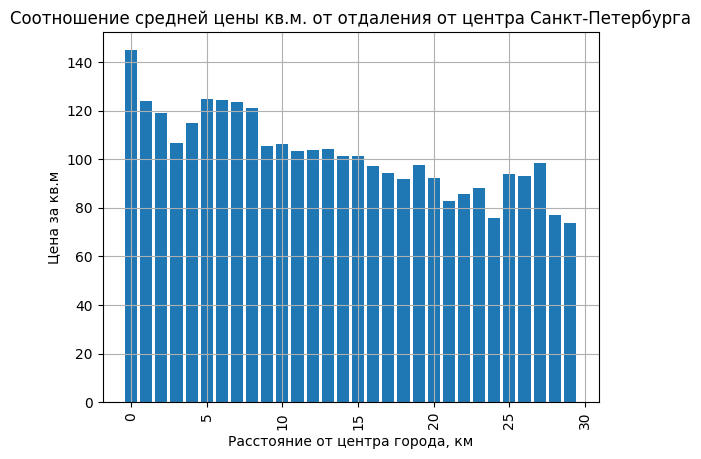

In [141]:
# Построение столбчатой диаграммы для средней цены за квадратный метр в зависимости от расстояния от центра города
plt.bar(citycenter_km_price.index, citycenter_km_price)
plt.xlabel('Расстояние от центра города, км')
plt.ylabel('Цена за кв.м')
plt.title('Соотношение средней цены кв.м. от отдаления от центра Санкт-Петербурга')
plt.grid()
plt.xticks(rotation=90)
plt.show()

Цены на объекты недвижимости в среднем имеют тенденцию к спаду по мере увеличения расстояния от центра Санкт-Петербурга, но все же график представляет из себя скорее волнообразную кривую с пиковыми значениями на 5, 19 и 27 км отдаления от центра. Предположу, что на данных расстояниях находятся новые комфортные жилые комплексы высокой ценновой категории.  

### Вывод 

- Самая распространенная общая площадь квартир: 52кв.м. Большая часть квартир в объявлениях с общей площадью - 40-70кв.м. 

- Самый распространненые значения жилой площади в квартирах: 18, 30 (медиана) и 43 кв.м.

- Средний диапазон цен на квартиры - примерно 3,5-7 млн.рублей. В основном: двухкомнатные 45-46кв.м.

- 4 и 4,5 млн.руб., однокомнатные 41кв.м. 3.5 млн.рублей

- По большей части, в данных представлены однокомнатные (34,1%) и двухкомнатные квартиры (33,7%), реже трехкмонатные (24.8%) и четырехкомнатные (4.9%). Апартаменты встречаются однокомнатные (43,2%), двухкомнатные(37%) и трехкомнатные(29,7%).

- Средняя высота потолков 2.65м, минимальная 2,4, максимальная 5,8 м. Средний диапазон высот: 2,6 - 2,7 м.

- В основном, квартиры расплогаются до 5 этажа 62.5%, реже на 5-10 этажах 22,6%, на 5-15 этажах 8,8%. На 15-20 этажах уже только 4.1%, выше 20 этажа лишь 2% всех квартир в данных. 

- На первом этаже распологаются 12,2% квартир в данных, на последнем 14,3%, на остальных 73,5% всех квартир.

- Большинство домов в выборке пятиэтажные и девятиэтажные.

- Самые распространнные расстояния от центра города для квартир в Санкт-Петербурге - это 5км, 8км и примерно 12-18км. Квартиры в Ленинградской области, в основном, находятся на расстояние от центра СПб: 18-19км (Парголово, Шушары), 30-35км (Колпино, Пушкин) и 50 км (Ломоносов). 

- Расстояния до аэропорта, в основном, заполнены в объявлениях квартир Санкт-Петербурга (66.5%), в среднем это примерно 15-30км, максимум 54,8км. Среди других городов в расстоянии до 30 км от аэропорта лидируют по количеству объявлений: Колпино, Шушары, Пушкин. От 30-40км - Петергоф, свыше 40км - Парголово.

- Зачастую, в объявлениях указывают расстояние до ближайшего парка, когда это расстояние до 1км. Чаще всего это 400-700м, в таких локациях как: Санкт-Петербург, Пушкин, Петергоф, Колпино и Кронштадт.

- В основном, в объявлениях указывают расстояние до ближайшего водоема, когда это расстояние до 1км. Чаще всего это 400-700м, в таких локациях как: Санкт-Петербург, Колпино, Пушкин, Шушары и Сестрорецк.
- Продажа квартиры обычно занимает около 3-4 месяцев, чаще до 60 дней. В норме до 100 дней. Быстрые продажи: до 45 дней, необычно долгие от 4 месяцев.

- Чаще всего объявления публикуют в будние дни: в четверг (18,2%), вторник (17.9%), чуть реже в среду или пятницу: 16,9% и 16,7% соответственно. Пик публикаций объявлений приходится на февраль. В мае публикуются минимум объявлений, затем снова рост, и в ноябре поднимается почти до отметок начала года и снова резкий спад в декабре. Небольшое количество объявлений в декабре и январе можно объяснить новогодними праздниками, а спад с мая по август - майскими праздниками и сезоном отпусков.

- Больше всего на цену влияет общая площадь квартиры, корреляция составляет 0,79. Площадь кухни никак не влият на конечную стоимость. День недели выбранный для публикации объявления может повлиять на стоимость квартиры на 0,07%, выше всего стоимость в среду. В период с 2014-2018 год стоимость квартир на продажу снизилось примерно на 54%, но общая площадь квартир на рынке также уменьшилось на 70%. Скачки цен за кв.м. за этот период не повлиял на показатели. 

- Самая высокая цена за квадратный метр в Санкт-Петербурге (111.49тыс.руб/кв.м), самая низкая в Гатчине (68.64тыс.руб/кв.м) в период с 2014-2018 гг.

- Цены на объекты недвижимости имеют тенденцию к спаду по мере увеличения расстояния от центра Санкт-Петербурга до тех пор, пока размах отдаления не пересекает другие достаточно крупные города Ленинградской области: Пушкин, Сестрорецк и Зеленогорск, хорошо подходящие для дорогостоящего пригородного жилья. 

## Общий вывод

1. - Такие параметры как: число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, число водоёмов в радиусе 3 км - нет возможности рассмотреть для анализа стоимости квартиры, так как заполненных данных слишком мало. Эти параметры можно автоматизировать, алгоритм можем сам вычислять расоложение рядом водоемов и парковых зон вблизи адреса объекта. Аналогично можно поступить с такими параметрами как: расстояние до ближайшего аэропорта, расстояние до центра города.
   - в столбце с числом балконов слишком много аномальных значений, поэтому данный параметр также не поддается анализу. 
   - в столбце с высотой потолков было много аномально маленьких значений, можно сделать минимальную границы для заполнения данного столбца
   - в столбце с названием населенного пункта слишком много неявных дубликатов. В этот параметр можно добавить функцию автоматического ввода данных. 

2. - Для анализа данных были посчитаны и добавленны такие дополнительные параметры, как: цена одного квадратного метра, день, месяц, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние в км до центра города.

3. - Больше всего предложений на квартиры с общей площадью в диапозоне: 40-70кв.м., с жилой: 18-43 кв.м. В среднем: 52кв.м. и 30кв.мм, соответсвенно. 

   - Средний диапазон цен на квартиры - примерно 3,5-7 млн.рублей. В основном: однокомнатные 41кв.м. стоимостью 3.5 млн.рублей, двухкомнатные 45-46кв.м., стоимостью 4-4,5 млн.руб.

   - По большей части, в данных представлены однокомнатные (34,1%) и двухкомнатные квартиры (33,7%), реже трехкмонатные (24.8%) и четырехкомнатные (4.9%). Апартаменты встречаются однокомнатные (43,2%), двухкомнатные(37%) и трехкомнатные(29,7%).

   - Средняя высота потолков 2.65м, средний диапазон высот: 2,6 - 2,7 м.

   - В основном, квартиры расплогаются до 5 этажа: 62.5%; реже на 5-10 этажах: 22,6%; выше 5  этажа остальные 14,9%. При этом на первом этаже распологаются 12,2% квартир в данных, на последнем 14,3%, на остальных 73,5% всех квартир.Большинство домов в выборке пятиэтажные и девятиэтажные: 36,6% и 24,5%, соответственно.
   
   - Самые распространнные расстояния от центра города для квартир в Санкт-Петербурге - это 5км, 8км и примерно 12-18км. Квартиры в Ленинградской области, в основном, находятся на расстояние от центра СПб: 18-19км (Парголово, Шушары), 30-35км (Колпино, Пушкин) и 50 км (Ломоносов). 

   - Расстояния до аэропорта, в основном, заполнены в объявлениях квартир Санкт-Петербурга (66.5%), в среднем это примерно 15-30км, максимум 54,8км. Среди других городов в расстоянии до 30 км от аэропорта лидируют по количеству объявлений: Колпино, Шушары, Пушкин. От 30-40км - Петергоф, свыше 40км - Парголово.

   - Зачастую, в объявлениях указывают расстояние до ближайшего парка или водоема, когда это расстояние до 1км. Чаще всего это 400-700м, наличие парка указывают чаще в таких локациях как: Санкт-Петербург, Пушкин, Петергоф, Колпино и Кронштадт. Наличие водоема: Санкт-Петербург, Колпино, Пушкин, Шушары и Сестрорецк.
   
   - Продажа квартиры обычно занимает около 3-4 месяцев, чаще до 60 дней. В норме до 100 дней. Быстрые продажи: до 45 дней, необычно долгие от 4 месяцев. Чаще всего объявления публикуют в будние дни: в четверг (18,2%), вторник (17.9%), чуть реже в среду или пятницу: 16,9% и 16,7%, соответственно. Максимум публикаций объявлений приходится на февраль и ноябрь. Небольшое количество объявлений в декабре и январе можно объяснить новогодними праздниками, а спад с мая по август - майскими праздниками и сезоном отпусков.

   - Больше всего на цену влияет общая площадь квартиры, корреляция составляет 0,79. День недели выбранный для публикации объявления может повлиять на стоимость квартиры на 0,07%, выше всего стоимость в среду. В период с 2014-2018 год стоимость квартир на продажу снизилось примерно на 54%, но общая площадь квартир на рынке также уменьшилось на 70%, т.е. выросло предложение на 1-2комнатные квартиры. 

   - Самая высокая цена за квадратный метр в Санкт-Петербурге (111.49тыс.руб/кв.м), самая низкая в Гатчине (68.64тыс.руб/кв.м) в период с 2014-2018 гг.

   - Цены на объекты недвижимости имеют тенденцию к спаду по мере увеличения расстояния от центра Санкт-Петербурга до тех пор, пока размах отдаления не пересекает другие достаточно крупные города Ленинградской области: Пушкин, Сестрорецк и Зеленогорск. 